# Data Science for Financial Markets

**Table of Contents**

+ Introduction


+ **Essential Libraries**
    + yfinance
    + Quantstats
    + PyPorfolioOpt
    + TA



+ **1|Getting Started: Measuring Stock Performance**
    + Daily Returns
    + Cumulative Returns
    + Histograms
    + Kurtosis
    + Skewness
    + Standard Deviation
    + Pairplots and Correlation Matrix
    + Beta and Alpha
    + Sharpe Ratio
    + Initial Conclusion


+ **2|Building and Optimizing Portfolios**
    + What is a Portfolio
    + Optimizing Portfolio
    + Markowits Mean-Variance Optimization Model
    + Black-Litterman Allocation Model
        + Prior
        + Views
        + Confidences


+ **3|Fundamental vs. Technical Analysis**
    + Fundamental vs. Technical Analysis: Which approach is Better?
    + Technical Indicators
        + Moving Averages
        + Bollinger Bands
        + Relative Strenght Index (RSI)
        + Average True Range (ATR)
    + Fundamental Indicators
        + Earnings Per Share (EPS)
        + Price-to_Earnings Ratio (R/E)
        + Return on Equity (ROE)
        + Debt-to-Equity Ratio
        + Dividend Yield


+ **4|Backtesting**
    + RSI Backtesting
        + Hourly Data
        + Daily Data
        + Weekly Data
    + Moving Average Crossover Backtesting
        + Hourly Data
        + Daily Data
        + Weekly Data


+ **Conclusion**

## Introduction

Data Science is a rapidly growing field that combines the power of statistical and computational techniques to extract valuable insights and knowdge from data.

It brings together multiple disciplines such as mathematics, statistics, computer science and domain specific knowledge to create a multi-faceted approach to understanding complex data patterns


The goal of Data Science is to provide a complete picture of data and transform it into actionable information that can inform business decisions, scientific breakthroughs and even public policy. With the increasing amount of data being generated everyday, Data Science is becoming an increasingly vital part of our data-driven world.


When it comes to financial marlets, Data Science can be applied in various ways, such as:

1. **Predictive Models:** Data Science professionals can use historical data to create predictive models that can identify trends and make predictions about future market conditions.

2. **Algorithmic Trading:** The use of algorithms that execute buy and sell orders autonomously, based on mathematical models through the analysis of price, volumn, and volatility, among many others.

3. **Portfolio Optimization:** Algorithms and other mathematical models can be used to optimize porfolios, aiming for maximization of returns and risk minimization.

4. **Fraud Detetion:** Data Scientists can use machine learning algorithms to identify fraudulent activities in financial transactions.

5. **Risk Management**: Data Science can be used to quatify and manage various types of financial risks, including market risk, credit risk and operational risk.

6. **Customer Analysis**: Financial institutions can use data science to analyze customer data and gain insights into customer behavior and preferences, which can be used to improve customer engagement and retention.



In this notebook, I aim to demonstrate how data science, as well as Python, can be powerful tools in exrting crucial insights from financial markets. I will demonstrate how these tools can be leveraged to build and **optimize portfolios**, **develop effective trading strategies** and perform detailed stock analysis. 

This would showcase the versatility and usefulness of Data Science and Python in the finance industry and provide a valuable resource for those interesed in utilizing these techniques to make informed investment decisions.

## Essential Libraries

While developing this notebook, we will use four essential libraries specifically designed for handling financial data.
I will provide a brief introduction to each library.


**yfinance**
One of the most popular Python library to extract data from financial markets!, It allows you to obtain and analyze historical market data from Yahoo!Finance

**Quanstats**
Quanstats is a Python library used for quantitative financial analysis.

**PyPorfolioOpt**
PyPortfolio is an extremely useful library for porfolio optimization and asset allocation. This library provides various tools to create optimized portfolios based on user defined constraints, objectives, and risk preferences.

**TA**
The TA (Technical Analysis) library is a powerful tool for conducting tehnical analysis using Python.

In [1]:
# Importing Libraries
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimizations and Allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression model
from sklearn.linear_model import LinearRegression

# Enabling plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warinings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## 1 | Getting Started: Measuring Stock Performance

### Daily Returns

The first thing we're going to look at is the daily returns. A stock's daily return is the percentual change in price over a single day. You can calculate it by subtracting the difference bettween **the stock's closing price on one day and it's closing price the day before** and multiply it by 100.

for instance, if a stock closes at `$100` on Monday, and it closes at `$102` dollars on Tuesday, its daily return would be calculated as:

                ((102 - 100) / 100) x 100 = 2%
                
This shows that the stock increased in value by 2% over the course of one day. On the other hand, if the stock had close at `$98` on Tuesday, the daily return would be calculated as:
    
                ((98 - 100) / 100) x 100 = -2%
                
Which means that the stock has decreased in value by 2% over the course of one day.

Daily returns are relevant for investors because they provide a quick way to check the performance of a stock over a short period.

With Quanstats, it's possible to plot daily returns charts, which are graphical representations of the daily percentage changes in stokcs, allowing investors to visualize the ups and downs of the stocks daily performance over time and extract information on volatility and consistency of returns.

In order to start our analysis, we're going to use Quanstats `utils.download_returns` method to download the daily returns for four different US stocks over the same period of time, for a fair comparison and analysis between them.

In [7]:
# Getting daily returns for 4 different US stocks in the same time window
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-11-01':'2023-06-10']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2010-11-01':'2023-06-10']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2010-11-01':'2023-06-10']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2010-11-01':'2023-06-10']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


We now have the dialy returns from november 1st, 2010, to june 10th, 2023, for four different US stocks from distinct industries Apple, Tesla, Walt Disney, and AMD

We can now plot the dailyy returns chart for each of them using Quantstats.

In [11]:
# Converting timezone
aapl.idex = aapl.index.tz_localize('UTC')
tsla.idex = tsla.index.tz_localize('UTC')
dis.idex = dis.index.tz_localize('UTC')
amd.idex = amd.index.tz_localize('UTC')




Apple Daily Returns Plot:



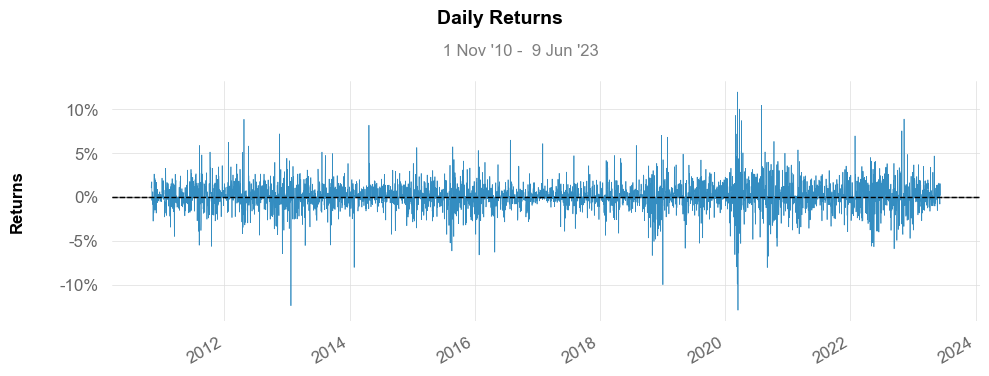






Tesla Inc. Daily Retunr Plot:



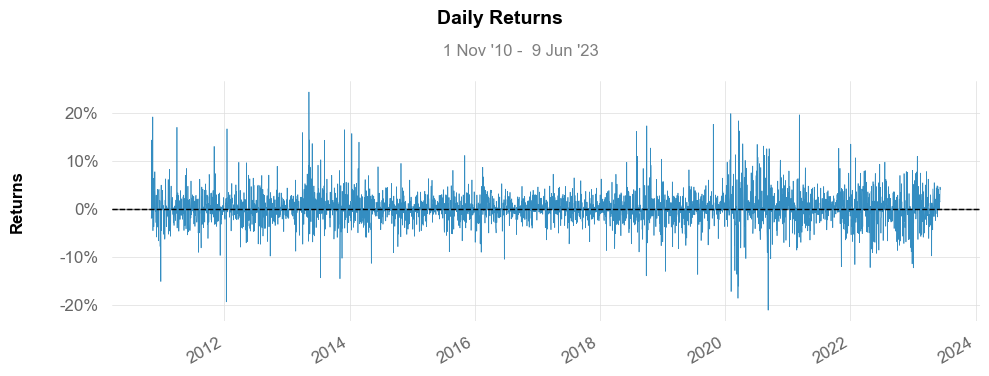






The Walt Disney Company Daily Returns Plot:



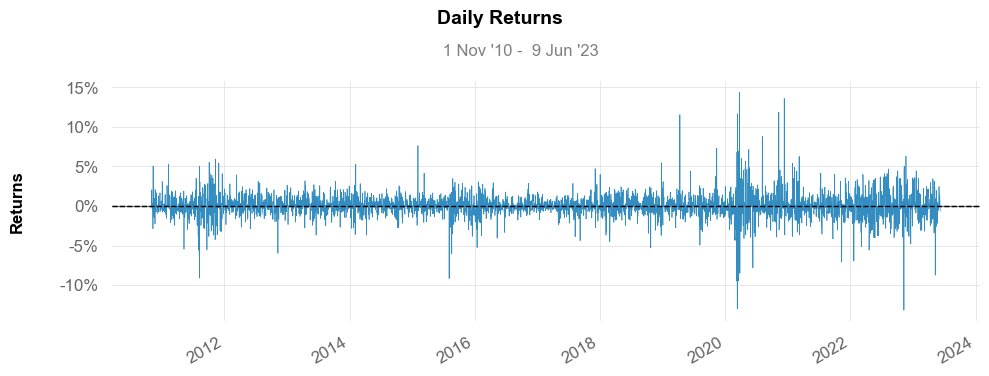






Advances Micro Devices, Inc. Daily Returns Plot:



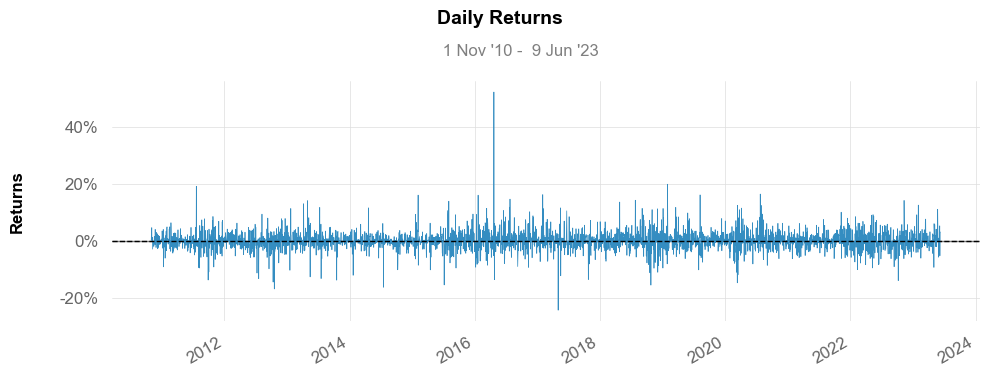

In [18]:
# plotting Daiy Returns for each stock
print('\n')
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl, aapl)
print('\n')
print('\n')
print('\nTesla Inc. Daily Retunr Plot:\n')
qs.plots.daily_returns(tsla, tsla)
print('\n')
print('\n')
print('\nThe Walt Disney Company Daily Returns Plot:\n')
qs.plots.daily_returns(dis, dis)
print('\n')
print('\n')
print('\nAdvances Micro Devices, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(amd, amd)

The plots above allows us to see an unusual variation in AMD stock prices, an increase of around 40% in its shares by 2016,which may have occurred for various factors, such as surprising earnings report, increased demand for the company's products, or favorable market conditions. This behavior may indicate high volatility, thus marking it a riskier investment.

On the other hand, Disney's and Apple's stocks seem more stable and predictable investment options at first glance.

### Cumulative Returns

To calculate a stock's cumulative return, the first thing to do is to determine the stock's initial price and its final price at the end of the specified period. Then subtract the initial prie from the final price, add any dividends or other income received, and divide the result by the initial price. This gives us the cumulative return as a decimal, which can be muktiokied by 100 to express it as a percentage.

It's important to note that cumulative return takes into account the effects of compounding, meaning that any gains from a previous period are reinvested and contribute to additional gains in future periods, which can result in a larger cumulative return than the simple average of the individual returns over the specified period.

Below, we can see line charts displaying the cummulative returns for each one of the stocks we've downloaded.




Apple Cumulative Returns Plot



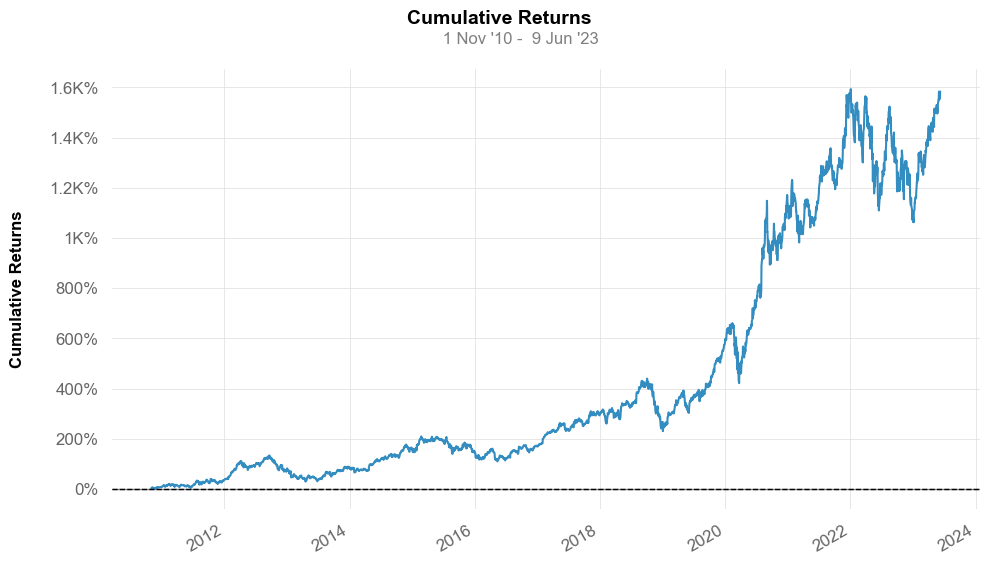






Tesla Inc. Cumulative Returns Plot



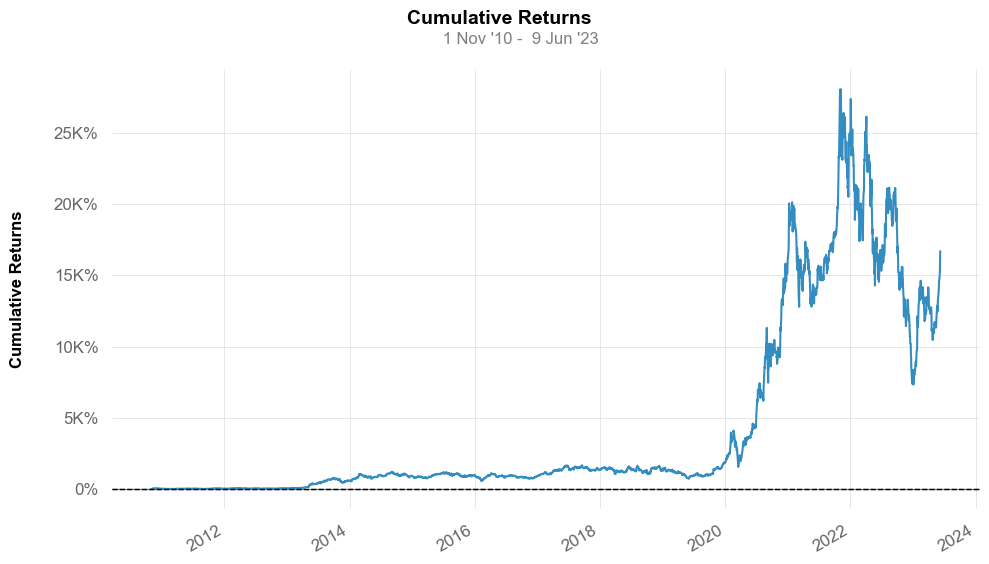






The Walt Disney Company Cumulative Returns Plot



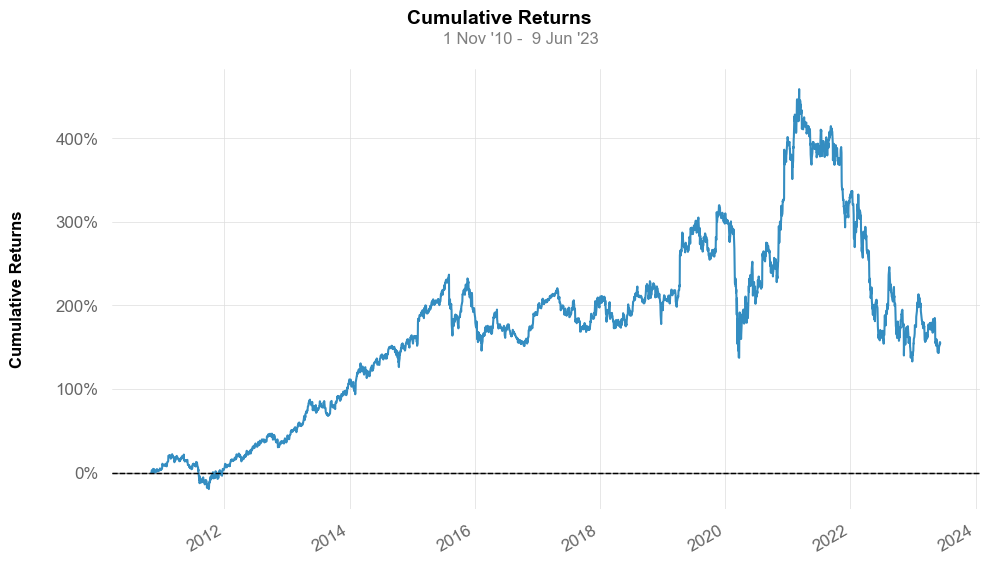






Advance Micro Devices. Inc. Cummulative Returns Plots



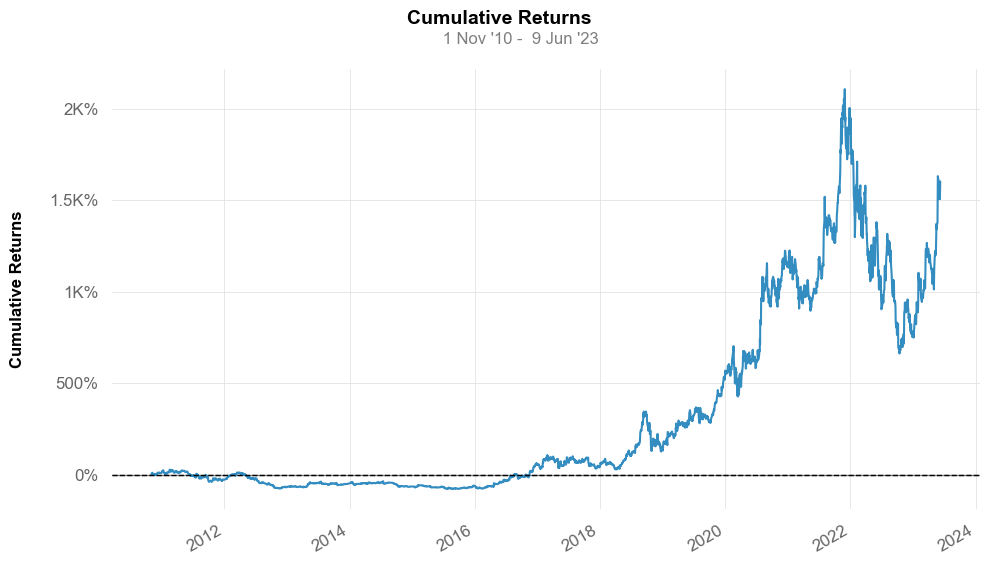

In [20]:
# plotting cumulative returns for each stock
print('\n')
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl)
print('\n')
print('\n')
print('\nTesla Inc. Cumulative Returns Plot\n')
qs.plots.returns(tsla)
print('\n')
print('\n')
print('\nThe Walt Disney Company Cumulative Returns Plot\n')
qs.plots.returns(dis)
print('\n')
print('\n')
print('\nAdvance Micro Devices. Inc. Cummulative Returns Plots\n')
qs.plots.returns(amd)

The chart above shows a considerate difference between Tesla's and Disney's returns. At the peak of its returns, Tesla surpassed the mark of over 25,000%, an extraordinary investment for those who bought the company's shares by the beginning of the decade. On the other hand, Disney's shares had some modest returns, peaking at around 650%.

Of course, when analyzing stocks data, we don't make an investment merely looking at the cumulative returns,. It's crusial to look at other indicators and evaluate the risk of the investment. Besides, 650% returns are still significant, and in the stock market, slow but steady growth can be just as valuable as explosive returns.

A variety of strategies must be taken into account in order to build a robust portfolio.

### Histograms

Histograms are graphical representation of values, displaying how frequent they are in a dataset.

Histograms of dialy returns are valuable to help investors to identify patterns, such as the range of daily returns of an asset over a certain period, indicating its level of stability and volatility.




Apple Daily Returns Histogram


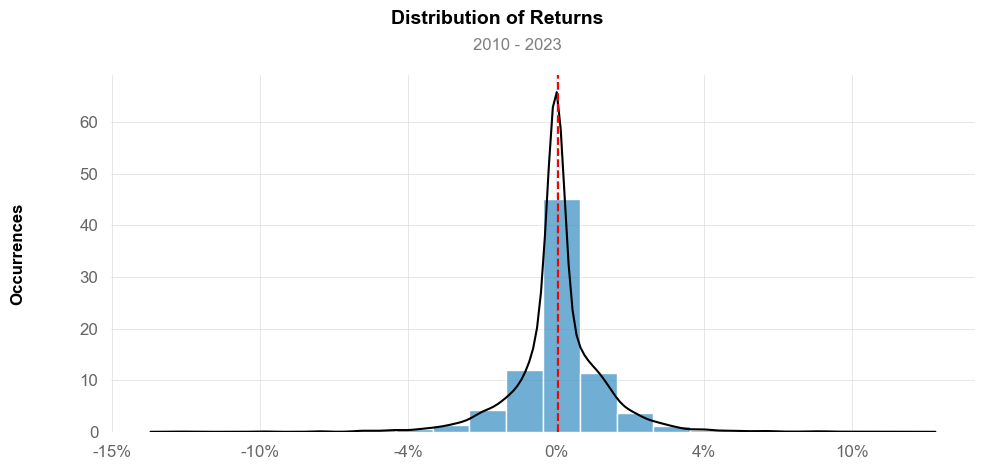




Tesla Inc. Daily Returns Histogram


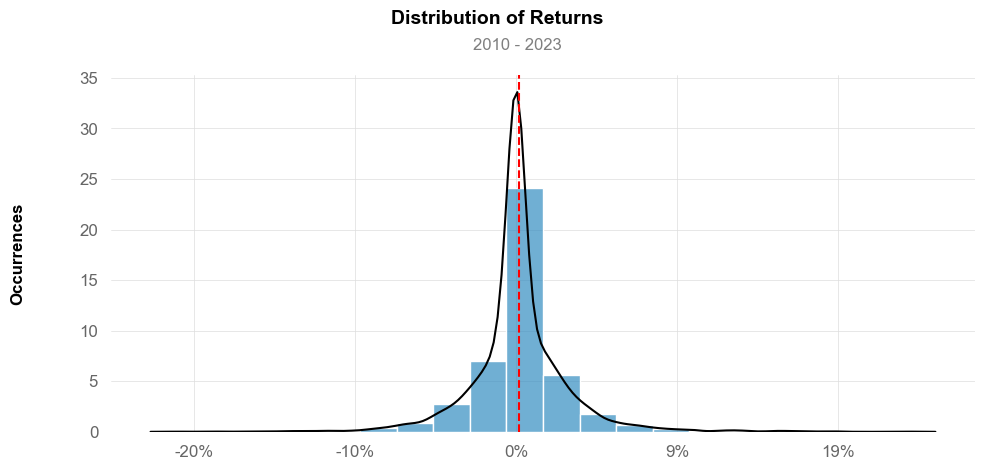




The Walt Disney Company Returns Histogram


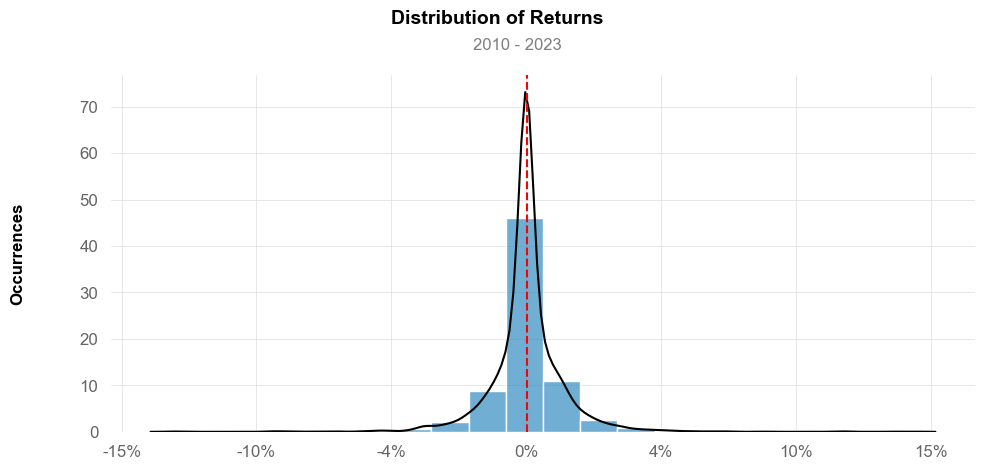




Advances Miro Devices, Inc. Daily Returns Histogram


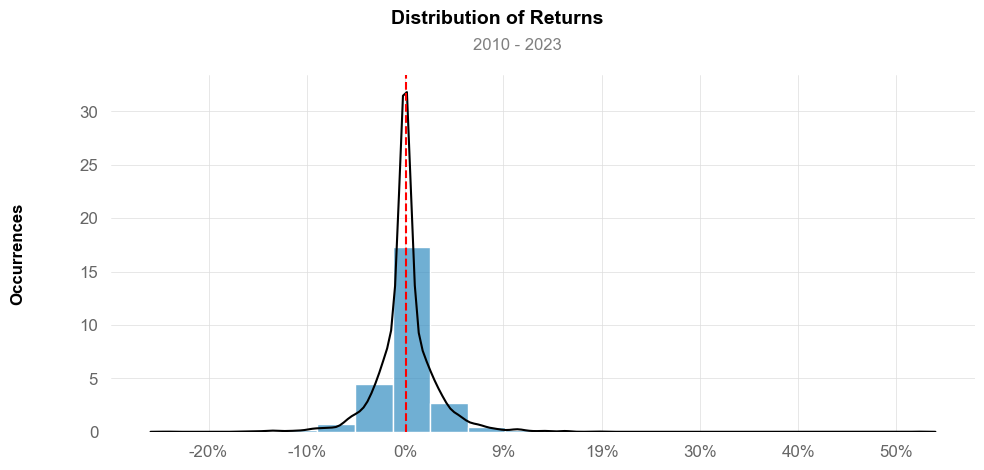

In [21]:
# Plotting histograms for dialy returns
print('\n')
print('\nApple Daily Returns Histogram')
qs.plots.histogram(aapl, resample = 'D')
print('\n')
print('\nTesla Inc. Daily Returns Histogram')
qs.plots.histogram(tsla, resample = 'D')
print('\n')
print('\nThe Walt Disney Company Returns Histogram')
qs.plots.histogram(dis, resample = 'D')
print('\n')
print('\nAdvances Miro Devices, Inc. Daily Returns Histogram')
qs.plots.histogram(amd, resample = 'D')

Through the analysis of the histograms, we can observe that most daily returns are close to zero in the center of the distribution. However, it's easy to see some extrme values that are distant from the mean, which is the case of AMD, with daily returns of around 50%, indicating the presence of utliers in the positive range of the distribution, in contrast with the negative field where it seems to limit at about -20%

Disney's Stocks have more balncd returns woth values ranging from -15% to 15%, while most returns are closer to the mean.

Through histograms, we can extract some valuable statistics such as kurtosis and skewness.

### Kurtosis

A high kurtosis value for daily returns maay indicate frequent fluctuations in price that deviate significantly from the average returns of that invesment, which can lead to increased volatility and risk associated with the stock.

A kurtosis value above 3.0 defines a leptokurtic distribution, characterized by outliers and more values that are distant from the average, which reflects in the histogram as stretching of the horizontal axis. Stocks with a leptokurtic distribution are generally associated with a higher level of risk but also offer the potential for higher returns due to the substantial price movements that have occurred in the past.

In the image below, it's possible to see the difference between a negative kurtosis on the left and a positive kurtosis on the right. The distribution on the left displays a lower probability of extreme values and a lower concentration of values around the mean, while the distribution on the right shows a higher conentration of values near the mean, but also the existence (and thus a higher probability of occurrence) of extreme values.

Kurtosis measures the concentration of observations in the tail versus the cnter of a distribution. in finance, a high level of excess kurtosis, or "tail risk", represents the chance of a loss occurring as a result of a rare event. This type of risk is important for investors to consider when making investment decisions, as it may impact the potential returns and stability of a particular stock.

In [22]:
# Using quanstats to measure kurtosis
print('\n')
print("\nApple's kurtosis: ", qs.stats.kurtosis(aapl).round(2))
print('\n')
print("\nTesla's kurtosis: ", qs.stats.kurtosis(tsla).round(2))
print("\n")
print("\nWalt Disney's kurtosis: ", qs.stats.kurtosis(dis).round(3))
print('\n')
print("\nAdvance Micro Deviceskurtosis: ", qs.stats.kurtosis(amd).round(3))




Apple's kurtosis:  5.29



Tesla's kurtosis:  5.04



Walt Disney's kurtosis:  10.855



Advance Micro Deviceskurtosis:  16.905


The kurtosis values above show that all four stocks, Apple, Tesla, Walt Disney and Advanced Micro Devices, have high levels of kurtosis, indicating a high concentration of observations in the tails of their daily returns distributions which suggests that all four stocks are subject to high levels of volatility and risk, with considerate price fluctations that deviate significantly from their avearge returns.

How ever, AMD has the highest kurtosis, with a value of 16.905, which indicates that AMD is subject to an extremely high level of volatility and tail risk, with a large concentration of extreme price movements. On the other hand, Disney has a kurtosis of 10.855, which is still higher than a typical value for normal distribution, but not as extreme as AMD's

### Skewness

Skewness is a metric that quantifies the asymmetry of returns, It reflects the shape of the distribution and determine if it is symmetrical, skewed to the left, or to the right.

Below, it is possible to see two different asymmetrical distributions. On the left, it shows an exmaple of a positively skewed distribution, with a long right tail, indicating a substantial probability of extremely positive daily returns compared to the normal distribution.

On the other hand, a negatively skewed distribution will most likely resemble the distribution on the right, with a long tail representing more frequency of outliers in the negative side of returns.

A skewness value of zero indicates a symmetrical distribution, in which observations are evenly distributed on both sies of the mean, and the right and keft tails are of approximately equal size.

The skewness is caluculated with the following formula:

        skewness = µ₃(x)-3*µ(x)*∂²(x)-µ³(x)
                   ________________________
                             ∂³(x)
                             
Where **x** represnets the set of returns data, µ represents the mean of the returns, and ∂ represents the standard deviation of the returns. This formula results in a single numerical value that summeruzes the skewness of returns.

In [24]:
# Measuring the skewness with quanstats
print('\n')
print("Apple's skewness: ", qs.stats.skew(aapl).round(2))
print('\n')
print("Tesla's skewness: ", qs.stats.skew(tsla).round(2))
print('\n')
print("Walt Disney's skewness: ", qs.stats.skew(dis).round(3))
print('\n')
print("Advances Micro Devices' skewness: ", qs.stats.skew(amd).round(3))



Apple's skewness:  -0.07


Tesla's skewness:  0.36


Walt Disney's skewness:  0.158


Advances Micro Devices' skewness:  1.034


Generally, a value between -0.5 and 0.5 indicates a slight level of skewness, while values below -1 and above 1 are indications of strong asymmetry.

Apple, Tesla, Disney are just slightly skewed, and Disney's slight skewness can be seen by looking at the range of the x-axis of it's histogram, where it is pretty musch balanced between -15% and 15%.

AMD sticks are strongly skewed, which can also be easily identified by looking at the range between -20% and 50% in its histogram. AMD has a lot of outliers on the positive tail, which could've been a good thing for thise who bought its shares but it also suggests higher volatility and risk to this investment.

### Standard Deviation

Standard deviation is a widely used statistical metric that quantifies the variability of the dataset. When applied to a stock's daily returns, it can indicate the risk level associated with investing in that particular stock. A stock exhibiting high daily return volatility, characterized by a high standard deviation, is considered riskier when compared to one with low daily return volatility, represented by a low standard deviation.


The formula for standard deviation is given by:

                    σ=√(1/N−1)∑Ni=1(x−xbar)²

Where x represents the set of returns data, **xbar** is the mean of the returns data, and **N** is the number of observations. Standard deviation enables investors to assess the risk level and to compare the volatility of different stocks. For instance, if two assets have similar average returns, but one has a higher standard deviation, it is usually considered a riskier investment. Hence, standard deviation serves as a useful tool in helping investors to make informed decisions regarding their investment choices and portfolio management.

In [25]:
# Calculating Standard Deviations
print('\n')
print("Apple's Standard Deviation from 2010 to 2023: ", aapl.std().round(3))
print('\n')
print("\nTesla's Standard Deviation from 2010 to 2023: ", tsla.std().round(3))
print('\n')
print("\nDisney's Standard Deviation from 2010 to 2023: ", dis.std().round(3))
print('\n')
print("\nAMD's Standard Deviation from 2010 to 2023: ", amd.std().round(3))



Apple's Standard Deviation from 2010 to 2023:  0.018



Tesla's Standard Deviation from 2010 to 2023:  0.036



Disney's Standard Deviation from 2010 to 2023:  0.017



AMD's Standard Deviation from 2010 to 2023:  0.036


Based on the values above, we can say that Apple and Disney are less volatile than Tesla and AMD, suggesting that Apple anad Disney are saafer investment options, exhibiting more stable price fluctuations in the market.

### Pairplots and Correlation Matrix

Correlation analysis in the stock market allows us for interesting investment strategies. A widely known strategy in the market is called Long-Short, which is the act of buying shares of a company, while selling shares of another company, believing that both assets will have opposite directions in the market. That is, when one goes up, the other goes down. To develop Long-Short strategies, investors rely on correlation analysis between stocks.

Correlation analysis is not only useful for Long-Short strategies, but it's also crucial to avoid systemic risk, which is described as the risk of the breakdown of an entire system rather than simply the failure of individual parts. To make it simple, if your portfolio has stocks that are highly correlated, or are all in the same industry, if something happens to that specific industry, all of your stocks may lose market value and it can cause greater financial losses.

Pairplots and Correlation matrices are usefull tools to visualize correlation among assets. In the correlation matrix, values range betweeb -1 and 1, where -1 represents a perfet negative correlation and 1 represents a perfect positive correlation.

Keep in mind that, when asstes are positively correlated, they tend to go up and down simultaneously in the market, while the opposite is true for those that are negatively correlated.

In [26]:
# Merging daily returns into one dataframe
merged_df = pd.concat([aapl, tsla, dis, amd], join='outer', axis=1)

merged_df.columns = ['aapl', 'tsla', 'dis', 'amd']
merged_df

,aapl,tsla,dis,amd
Date,,,,
2010-11-01,0.010632,-0.019689,-0.002768,0.002725
2010-11-02,0.017029,-0.007473,0.002220,0.024456
2010-11-03,0.011120,0.024470,0.004985,0.013263
2010-11-04,0.017487,0.143776,0.020391,0.047120
2010-11-05,-0.003582,-0.018474,0.004591,0.005000
...,...,...,...,...
2023-06-05,-0.007571,0.017012,0.002534,0.000594
2023-06-06,-0.002060,0.017003,0.012747,0.053422
2023-06-07,-0.007756,0.014731,0.003906,-0.051517


The dataframe above has dates serving as the index and each stock is represented as a column, displaying their respetive returns for each specific day. This dataframe will be used to calcualte the correlation between these stocks and to create a pairplot visualization.

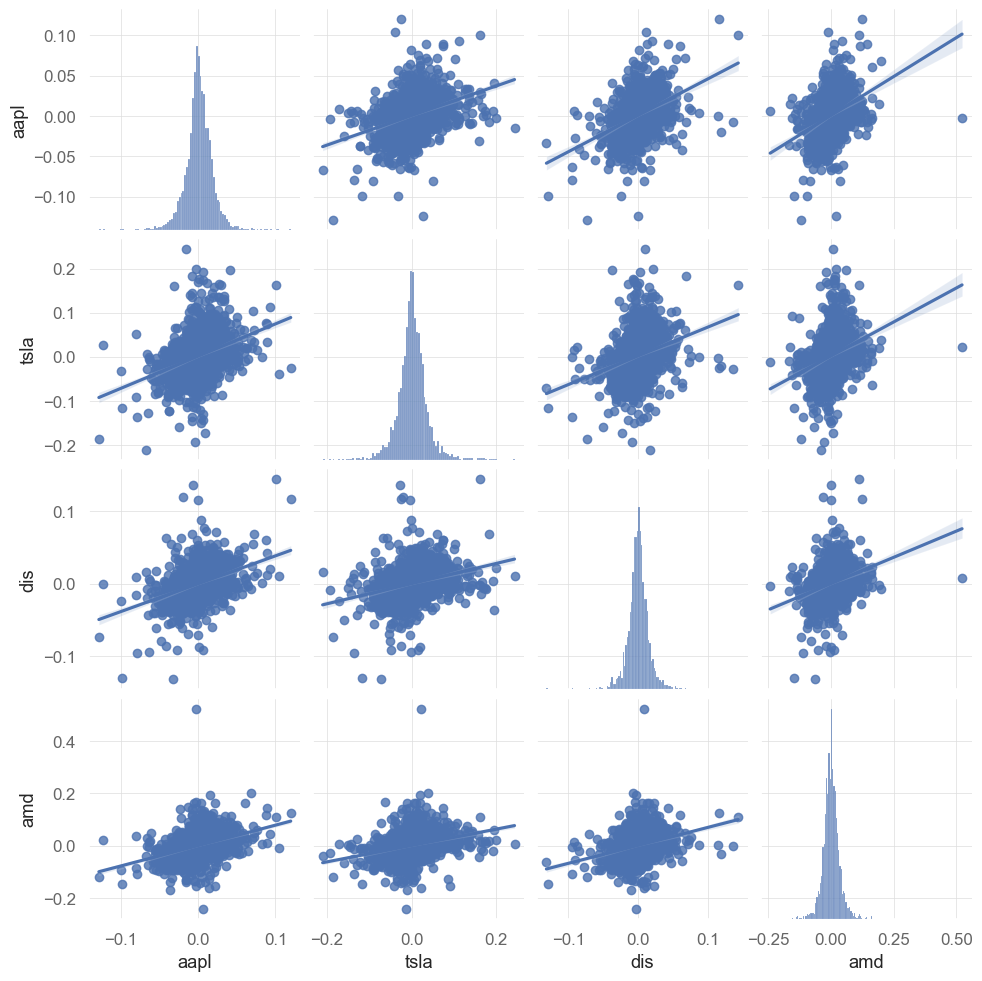

In [27]:
# pairplot
sns.pairplot(merged_df, kind='reg')
plt.show()

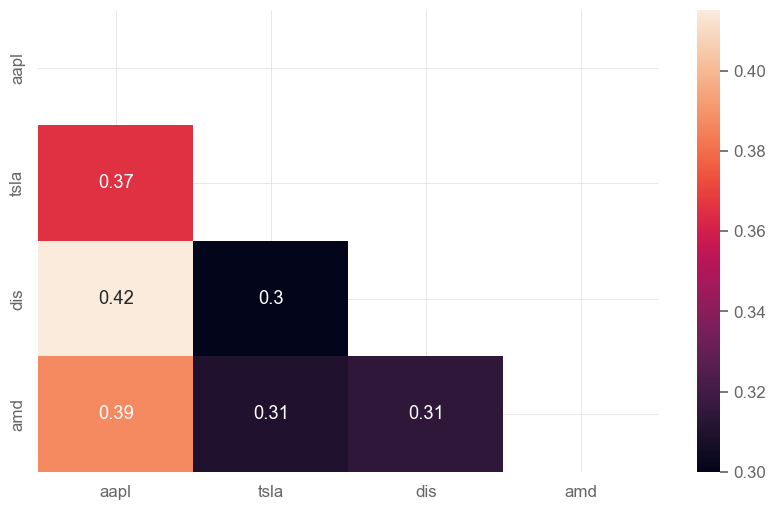

In [33]:
# Correlative Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

The stronger correlation among the assets above is between Disney and Apple. However, a correlation of 0.42 is not a strong one.


It's important to note that there is not any negative correlation among the assets above, which indicates that none of them acts to limit losses. In the financial market, a hedge is an investment position intended to offset potential losses by investing in assets that may have a negative correlation with the others in a portfolio.

Many investors buy gold to serve as protection for riskier investments, such as stocks, and when the market as a whole goes into a bear market, the gold tends to increase in value, limiting potential losses for the overall portfolio.

### Beta and Alpha

Beta and Alpha are two key metrics used in finance to evaluate the performance of a stock relative to the overall market.

Beta is a measure of a stock's volatility compared to the market. A Beta of  means that the stock is as volatile as the market, a Beta greater than 1 indicates higher volatility than the market, and a Beta less than 1 suggests lower voaltility.

Alpha, on the other hand, is a measurement of a stock's excess return relative to its expected performance based on its Beta.

A positive Alpha indicates that a stock has outperformed its expected performance based on its Beta, while a negative Alpha suggests underperformance. By analyzing the Beta and Alpha values of stocks, investors can get a better understanding of the risk and potential returns of the stock compared to the market, and make informed investment decisions accordingly.

To determine Beta and Alpha, we require data from the SP500, which acts as the benchmark, to fit a linear regression model between the stocks and the index. This will enable us to extract the Beta and Alpha values of the stocks.

Let's then load data on the SP500:

In [42]:
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2010-11-01':'2023-06-10']
sp500.index = sp500.index.tz_localize('UTC')
sp500

[*********************100%%**********************]  1 of 1 completed


Date
2010-11-01 00:00:00+00:00    0.000947
2010-11-02 00:00:00+00:00    0.007759
2010-11-03 00:00:00+00:00    0.003678
2010-11-04 00:00:00+00:00    0.019283
2010-11-05 00:00:00+00:00    0.003923
                               ...   
2023-06-05 00:00:00+00:00   -0.002004
2023-06-06 00:00:00+00:00    0.002354
2023-06-07 00:00:00+00:00   -0.003812
2023-06-08 00:00:00+00:00    0.006189
2023-06-09 00:00:00+00:00    0.001148
Name: Close, Length: 3173, dtype: float64

In [43]:
# Removing indexes
sp500_no_index = sp500.reset_index(drop=True)
aapl_no_index = aapl.reset_index(drop=True)
tsla_no_index = tsla.reset_index(drop=True)
dis_no_index = dis.reset_index(drop=True)
amd_no_index = amd.reset_index(drop=True)

In [44]:
sp500_no_index # Daily returns for the SP500

0       0.000947
1       0.007759
2       0.003678
3       0.019283
4       0.003923
          ...   
3168   -0.002004
3169    0.002354
3170   -0.003812
3171    0.006189
3172    0.001148
Name: Close, Length: 3173, dtype: float64

We can use the Linear Regression model to extract Beta and Alpha from the analyzed stocks.

In [45]:
# fitting linear relation among Apple's return and Benhmark
X = sp500_no_index.values.reshape(-1,1)
y = aapl_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('\n')
print('AAPL beta: ', beta.round(3))
print('\nAAPL aplha: ', alpha.round(3))



AAPL beta:  [1.118]

AAPL aplha:  [0.001]


In [48]:
# fitting linear relation among Tesla's return and Benhmark

y = tsla_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('\n')
print('TSLA beta: ', beta.round(3))
print('\nTSLA aplha: ', alpha.round(3))



TSLA beta:  [1.401]

TSLA aplha:  [0.002]


In [47]:
# fitting linear relation among Disney's return and Benhmark

y = dis_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('\n')
print('DIS beta: ', beta.round(3))
print('\nDIS aplha: ', alpha.round(3))



DIS beta:  [1.028]

DIS aplha:  [-0.]


In [49]:
# fitting linear relation among AMD's return and Benhmark

y = amd_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('\n')
print('AMD beta: ', beta.round(3))
print('\nAMD aplha: ', alpha.round(3))



AMD beta:  [1.608]

AMD aplha:  [0.001]


Beta values for all the stocks are greater than 1, meaning that they are more volatile than the benchmark and may offer higher returns, but also come with greater risks. On the other hand, the alpha values for all the stocks are small, close to zero, suggesting that there is little difference between the expected returns and the risk-adjusted returns.

### Sharpe Ratio

The Sharpe ratio is a measure of the risk-adjusted return of an investment. It is calculated by dividing the average excess return of the invesment over the standard deviation of the returns, as shown by the following equation:

            Sharpe ratio = Rp - Rf
                           _______
                              ∂p

Where Rp is the average return of the investment, Rf is the risk-free rate of return, and ∂p is the standard deviation of the returns.

The average excess return is the difference between the average return of the investment and the risk-free rate of return, typically represented by a government bond. The standard deviation is a measurement of the volatility of returns.

A higher Sharpe ratio indicates that an investment provides higher returns for a given level of risk compared to other investments with a lower Sharpe ratio. In general, a Sharpe ratio greater than 1 is considered good, while a Sharpe ratio less than 1 is considered poor. A Sharpe ratio of 1 means that the investment's average return is equal to the risk-free rate of return.


In general, a Sharpe ratio under 1.0 is considered bad, equal to 1.0 is considered acceptable or good, 2.0 or higher is rated as very good, and 3.0 or higher is considered excellent.

In [50]:
# Calculating Sharpe ratio
print('\n')
print("Sharpe Ratio for AAPL: ", qs.stats.sharpe(aapl).round(2))
print('\n')
print("Sharpe Ratio for TSLA: ", qs.stats.sharpe(tsla).round(2))
print('\n')
print("Sharpe Ratio for DIS: ", qs.stats.sharpe(dis).round(2))
print('\n')
print("Sharpe Ratio for AMD: ", qs.stats.sharpe(amd).round(2))



Sharpe Ratio for AAPL:  0.93


Sharpe Ratio for TSLA:  1.0


Sharpe Ratio for DIS:  0.41


Sharpe Ratio for AMD:  0.67


Apple and Tesla have the highest Sharpe ratios amonng th stocks analyzed, 0.93 and 1.0 respectively, with Apple sharpe ratio indicating that these investments offer a better risk-return relationship, while Tesla's investment's average return is equal to the risk-free rate of return.

It is important to note that the sharpe ratio is an annual metric and, since the beginning of 2022, the market, in general, has been bearish, with prices going down over the past year.

Initial Conclusions

Some initial conclusions can be drawn via the analysis of the metrics above:


. Apple and Tesla have the best Sharpe ratios, which indicates a better risk-return relationship;


. Tesla has the highest returns of them all, but it's also more volatile than Apple and Disney;


. Apple has higher returns and low volatility compared to the other assets. It has the best Sharpe ratio, low beta, low standard deviation, and low asymmetry of returns;

. AMD is the riskier and more volatile investment option of the four. Its returns distribution is highly asymmetric, it has a high standard deviation value and high beta;


. Disney stocks may be a good option for investors that are sensitive to risk, considering they had a steady and stable return over the period.


It's possible to say that, from all the assets analyzed, Apple offers the best risk-return relationship, with high rentability and lower risk than the other options.

# 2 | Building and Optimizing Portfolios

**What is a portfolio?**

A portfolio in financial markets is a collection of financial assets, such as stocks, bonds, commodities and other investments, held by an individual or institution. Portfolios provide investors with a way to diversify their investments, manage risk and inreasse returns.

To build a portfolio, investors must select a combination of assets that are expected to perform well under different economic and market conditions. The allocation of funds to each asset is determined by the investor's risk tolerance and investment goals. 

This process involves analyzing the investor's financial situation, objectives, time horizon, and risk tolerance, as well as researching and analyzing individual securities and market trends. Portfolios are dynamic and should be reviewed and adjusted periodically to reflect changes in market conditions and in the investor's financial situation, or goals.


The weights in a portfolio refer to the percentage of the total value allocated to each individual asset. Allocating weights is a critical aspect of portfolio building because it determines the level of risk and return characteristics of the portfolio. The weight assigned to an asset reflects the investor's confidence in the asset's ability to generate returns and their willingness to accept its associated risk.

Weights can be determined by analyzing an asset's historical performance, future growth prospects, sector exposure, and diversification benefits. Portfolio managers may use various techniques, such as modern portfolio theory and factor-based investing, to determine optimal weightings. Getting the weightings right is crucial to achieving the desired outcomes and is a key factor in the success of any investment strategy.


To start exploring portfolio construction and optimization, we ought to build a portfolio consisting of the four stocks that have been analyzed so far, with an initial weighting of 25% each.

In [52]:
weight = 0.25 # defining weights for each stock
portfolio = aapl*weight + tsla*weight + dis*weight + amd*weight # Creating porfolio multiplying each stock for its respective weight
portfolio # displaying portfolio's daily returns

Date
2010-11-01   -0.002275
2010-11-02    0.009058
2010-11-03    0.013459
2010-11-04    0.057194
2010-11-05   -0.003116
                ...   
2023-06-05    0.003142
2023-06-06    0.020278
2023-06-07   -0.010159
2023-06-08    0.022180
2023-06-09    0.017066
Name: Close, Length: 3173, dtype: float64

With Quanstats, you can easily create a report to compare the portfolio's performance and its level of risk with a benchmark, which in this case is the SP500. The platform provides various metrics and useful visualizations to analyze the portfolio's performance and risk.

In [73]:
# converting my sp500 time format
sp500.index = pd.to_datetime(sp500.index)

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-11-01   2010-11-01
End Period                 2023-06-09   2023-06-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          263.31%      3,534.21%
CAGR﹪                     7.32%        21.74%

Sharpe                     0.67         1.09
Prob. Sharpe Ratio         99.05%       99.99%
Smart Sharpe               0.65         1.05
Sortino                    0.93         1.59
Smart Sortino              0.9          1.54
Sortino/√2                 0.66         1.13
Smart Sortino/√2           0.64         1.09
Omega                      1.21         1.21

Max Drawdown               -33.92%      -52.28%
Longest DD Days            522          522
Volatility (ann.)          17.64%       30.63%
R^2                        0.55         0.55
Information Ratio          0.06         0.06
Calmar          

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2022-12-28,2023-06-09,522,-52.277672,-50.575280
2,2020-02-20,2020-03-18,2020-06-08,110,-39.974771,-38.637692
3,2012-03-28,2012-11-15,2013-05-08,407,-33.485979,-31.909526
4,2015-07-06,2016-02-10,2016-04-21,291,-29.332407,-27.378170
5,2018-10-02,2018-12-24,2019-07-02,274,-25.612972,-22.598411


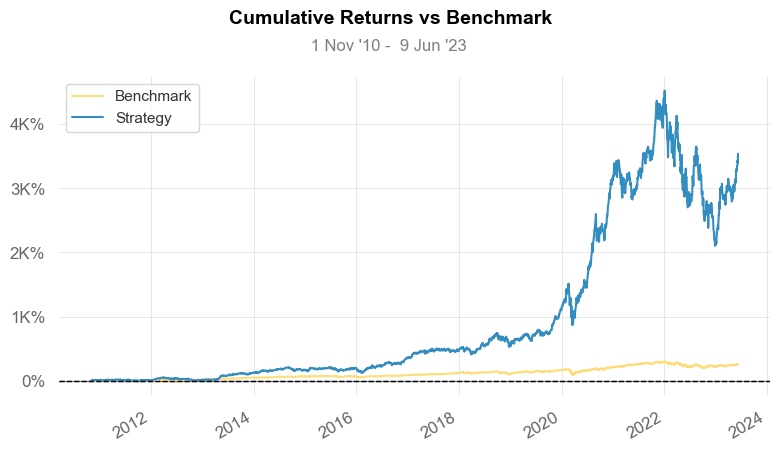

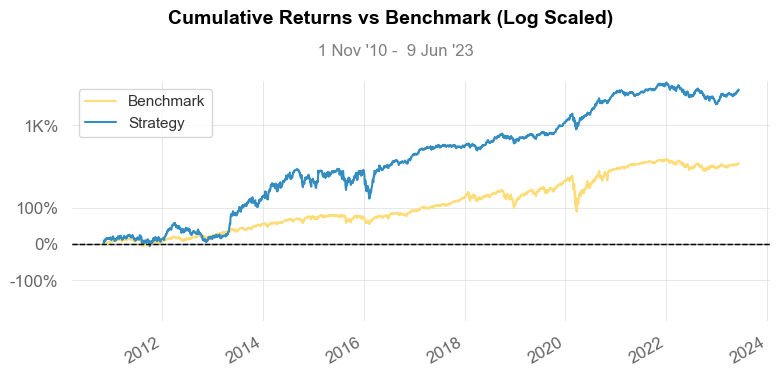

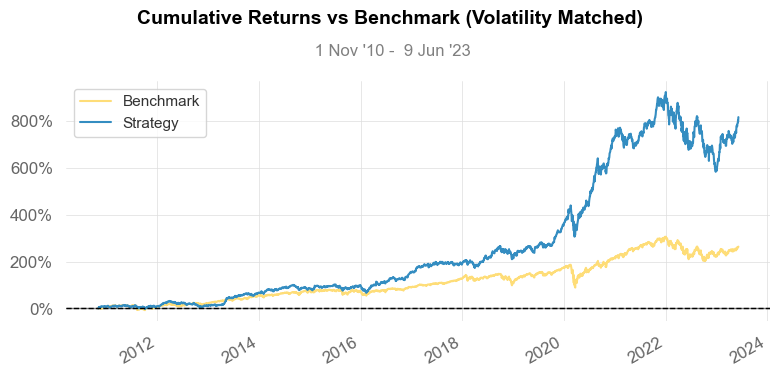

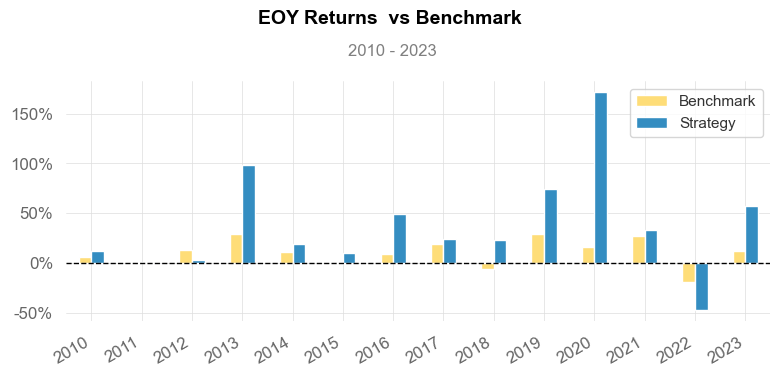

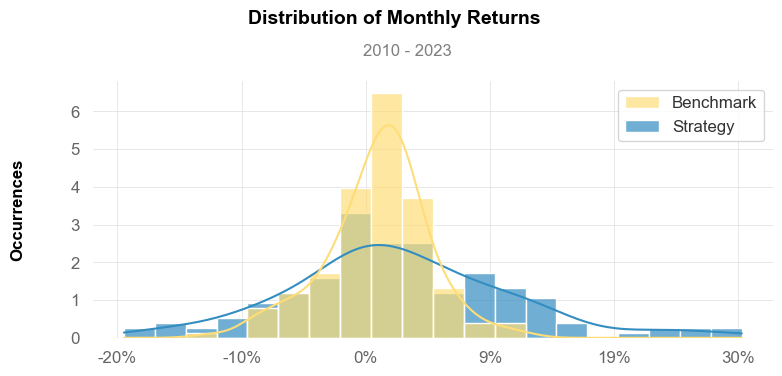

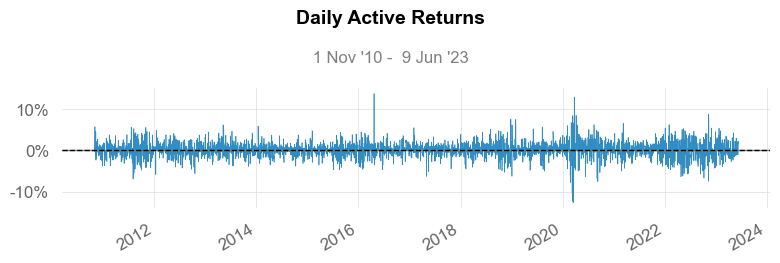

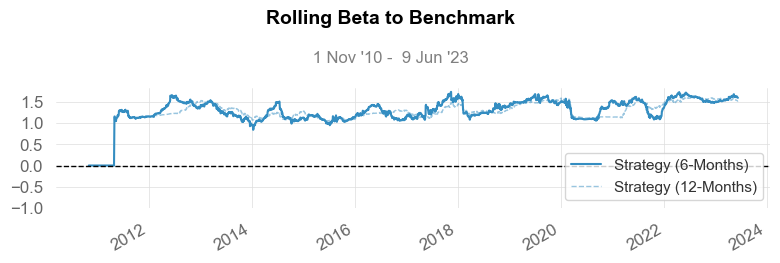

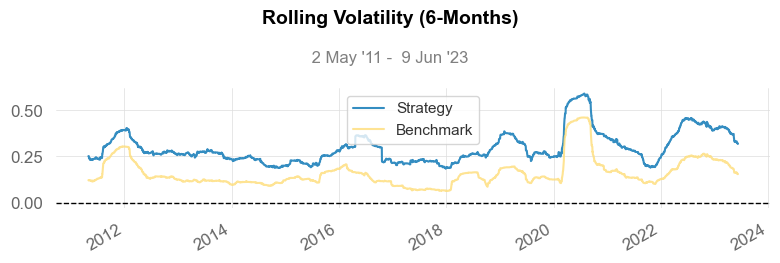

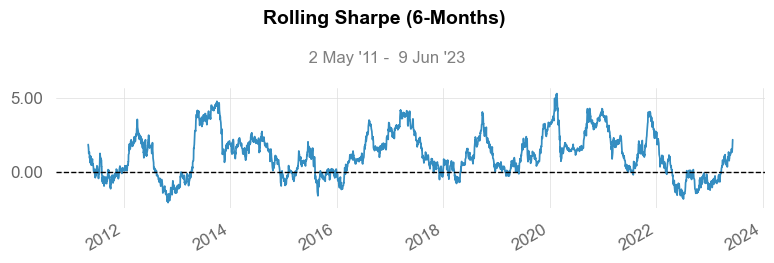

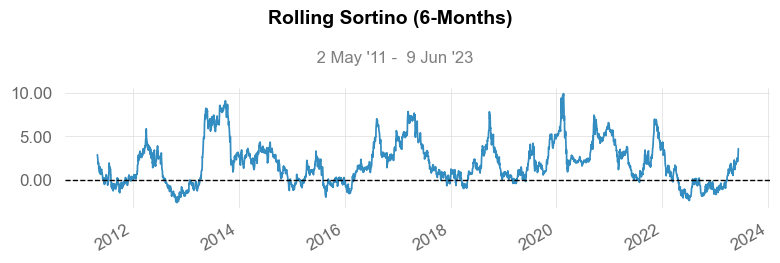

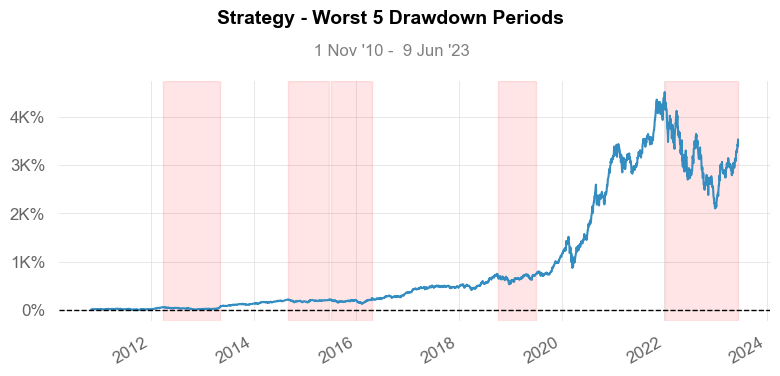

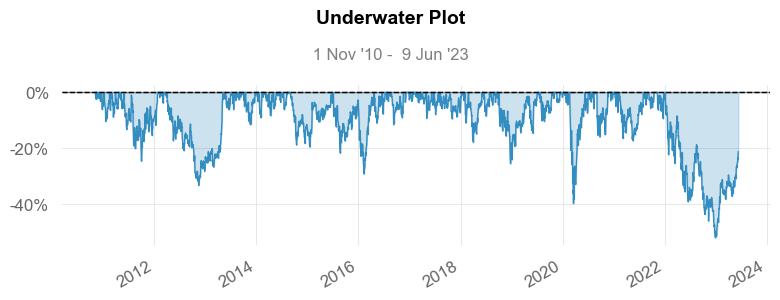

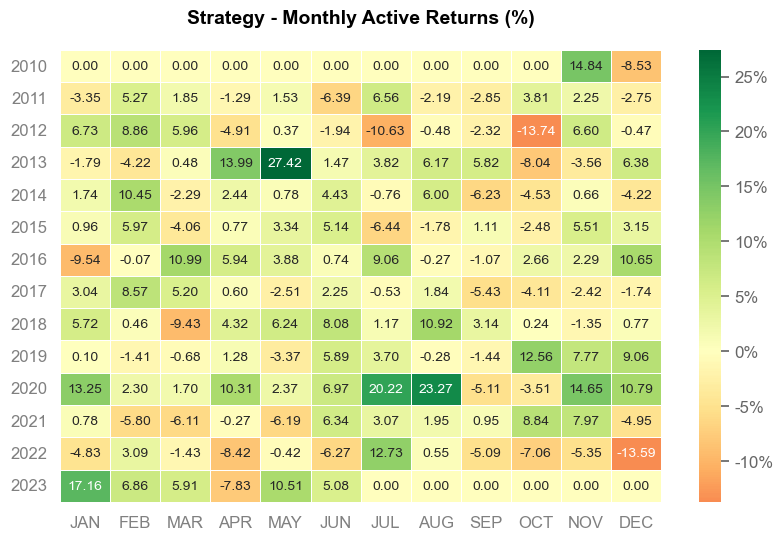

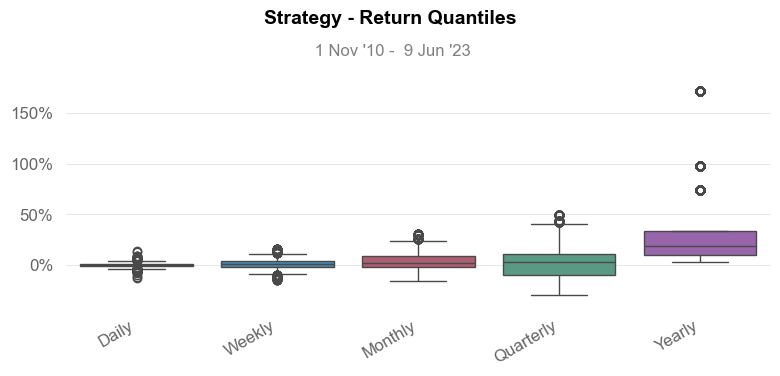

In [75]:
# Generating report on portfolio performance from july 1st, 2010 to february 10th, 2023
qs.reports.full(portfolio, benchmark = sp500)

In [54]:
aapl

Date
2010-11-01    0.010632
2010-11-02    0.017029
2010-11-03    0.011120
2010-11-04    0.017487
2010-11-05   -0.003582
                ...   
2023-06-05   -0.007571
2023-06-06   -0.002060
2023-06-07   -0.007756
2023-06-08    0.015465
2023-06-09    0.002160
Name: Close, Length: 3173, dtype: float64

We have a range of metrics and plots available to look at. First, the Cumulative Return of the portfolio is higher than the benchmark, at 3,534.21% compared to 263.31% for the sp500. The Sharpe Ratio and Sortino Ratio of the portfolio are also higher, indicating that it generates better returns for the level of risk taken. 

In addition, the portfolio has higher expected daily, monthly and annual returns than the SP500, and its best day, month, and year outperforms the benchmark's best day, month, and year.

However, the portfolio's maximum drawdown is greater than the benchmark, at -52.28% compared to -33.92%. This indicates that the portfolio has experienced larger losses at times than the benchmark. The annualized volatility of the portfolio is also higher, at around 30.63% compared to the benchmark's 17.64%.

While the portfolio has higher returns on its best day, month, and year, it also has bigger losses on its worst day, month, and year compared to the benchmark. The beta of 1.29 shows that the portfolio is about 28% more volatile than the overall market, and its 74.21% correlation indicates a strong positive relationship among the four stocks, suggesting that they tend to move in the same direction, which could increase the systemic risk of the portfolio.

Overall, the portfolio has generated impressive returns, but it also comes with a higher degree of risk and volatility. This prompts the question of whether or not it's possible to optimize the portfolio to reduce risk and volatility while also increasing returns.

### Optimizing Porfolio

Portfolio optimization is the process of selecting the optimal combination of assets and weights to maximize returns and minimize risk. This process involves selecting the most appropriate weights for each asset,by taking into account the historical performance of the assets, their correlations with each other, and other relevant factors such as market conditions and economic outlook. The main goal is to create a well-diversified portfolio that balances risk and returns, and that aligns with the investor's risk tolerance.

In Python, PyPortfolioOpt is a very useful library for portfolio optimization, providing an efficient and easy-to-use toolset for constructing optimal portfolios, with a wide range of optimization algorithms and methods available. These include modern portfolio theory, minimum variance portfolio, maximum diversification portfolio, Black-Litterman optimization, and many more.

To start the optimization process, we must have a pandas dataframe containing the adjusted closing prices of the stocks, with dates as index, and each columns representing each stock. This dataframe will serve as input to optimize the weighting of the stocks in the portfolio

In [76]:
# Getting dataframesinfo for stocks using yfinance
aapl_df = yf.download('AAPL', start = '2010-11-01', end = '2023-06-11')
tsla_df = yf.download('TSLA', start = '2010-11-01', end = '2023-06-11')
amd_df = yf.download('AMD', start = '2010-11-01', end = '2023-06-11')
dis_df = yf.download('DIS', start = '2010-11-01', end = '2023-06-11')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [78]:
# Extracting Adjusted Close for each stock
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
dis_df = dis_df['Adj Close']
amd_df = amd_df['Adj Close']

In [79]:
# Merging and creating an Adi Close dataframe for stocks
df = pd.concat([aapl_df, tsla_df, dis_df, amd_df], join='outer', axis=1)

df.columns = ['aapl','tsla', 'dis', 'amd']
df

,aapl,tsla,dis,amd
Date,,,,
2010-11-01,9.208829,1.427333,31.383198,7.360000
2010-11-02,9.365650,1.416667,31.452883,7.540000
2010-11-03,9.469793,1.451333,31.609667,7.640000
2010-11-04,9.635394,1.660000,32.254234,8.000000
2010-11-05,9.600881,1.629333,32.402302,8.040000
...,...,...,...,...
2023-06-05,179.101868,217.610001,91.000000,117.930000
2023-06-06,178.732864,221.309998,92.160004,124.230003
2023-06-07,177.346558,224.570007,92.519997,117.830002


The dataframe above will be used as input for the algorithms to optimize the portfolio

## Markowitz Mean-Variance Optimization Model

The Markowitz Mean-Variance Optimization Model is a widely-used framework for constructing portfolio with the best risk-return relationship. It is base on the idea that investors should maximize the expected return of a portfolio while minimizing its risk.

PyPortfolioOpt simplifies the implementation of the Markowitz Mean-Variance Optimization Model, allowing investors to easily determine how to allocate weights across a portfolio for maximal Sharpe ratio, besides many other different objectives according to each investor's risk tolerance and goals.

There are two key requirements for mean-variance optimization:

First, we need to have expected returns for each of the assets in the portfolio. PyPortfolioOpt provides the expected_returns module, which calculates expected returns for the assets by computing the arithmetic mean of their daily percentage changes. The module assumes that daily prices are available as input and produces expected annual returns as output. More information on this topic is available here.

Secondly, we need to choose a risk model that quantifies the level of risk in each asset. The most commonly used risk model is the covariance matrix, which describes the volatilities of assets and the degree to which they are co-dependent. Choosing an appropriate risk model is critical, because it can help to reduce risk by making many uncorrelated bets. PyPortfolioOpt offers a range of risk models to choose from, including the annualized sample covariance matrix of daily returns, semicovariance matrix, and exponentially-weighted covariance matrix. Further information on risk models can be found here

In [80]:
# Calculate the anualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df) # expected returns
S = risk_models.sample_cov(df) # Covariance matrix

In [81]:
# the annualized expeted returns
mu

aapl    0.266662
tsla    0.504689
dis     0.089135
amd     0.252270
dtype: float64

In [82]:
# covariance metrix
S

,aapl,tsla,dis,amd
aapl,0.081472,0.059600,0.031258,0.063479
tsla,0.059600,0.325602,0.045031,0.101363
dis,0.031258,0.045031,0.069266,0.047446
amd,0.063479,0.101363,0.047446,0.329010


Now that we have estimated the expected returns and the covariance matrix, we can use those inputs for portfolio optimization.

The PyPortfolioOpt library provides the EfficientFrontier class, which takes the covariance matrix and expected returns as inputs. The weights variable stores the optimized weights for each asset based on the specified objective, which in this case is the maximization of the Sharpe ratio, achieved by using the max_sharpe method.


PyPortfolioOpt offers various other optimization objectives, such as weights optimized for minimum volatility, maximum returns for a given target risk, maximum quadratic utility, and many others. To read more on optimization objectives, click here.

In [84]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# optimized weights and expected performance for porfolio
clean_weights

OrderedDict([('aapl', 0.67476), ('tsla', 0.32524), ('dis', 0.0), ('amd', 0.0)])

After running the optimizer, it resulted in an optimized weighting for a portfolio where 67.47% of its allocation is invested in Apple stocks, and the remaining 32.52% invested in Tesla stocks. No allocation was made to Disney or AMD.


With the optimized weights in hand, we can construct a new portfolio and use Quantstats to compare its performance to that of the previously constructed portfolio.

In [85]:
# Creating a new portfolio with optimized weights
new_weights = [0.67476, 0.32524]
optimized_portfolio = aapl*new_weights[0] + tsla*new_weights[1]
optimized_portfolio

Date
2010-11-01    0.000770
2010-11-02    0.009060
2010-11-03    0.015462
2010-11-04    0.058561
2010-11-05   -0.008425
                ...   
2023-06-05    0.000424
2023-06-06    0.004140
2023-06-07   -0.000443
2023-06-08    0.025338
2023-06-09    0.014669
Name: Close, Length: 3173, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-11-01   2010-11-01
End Period                 2023-06-09   2023-06-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          3,534.21%    5,168.31%
CAGR﹪                     21.74%       24.24%

Sharpe                     1.09         1.16
Prob. Sharpe Ratio         99.99%       100.0%
Smart Sharpe               1.05         1.12
Sortino                    1.59         1.72
Smart Sortino              1.54         1.66
Sortino/√2                 1.13         1.22
Smart Sortino/√2           1.09         1.17
Omega                      1.22         1.22

Max Drawdown               -52.28%      -47.74%
Longest DD Days            522          568
Volatility (ann.)          30.63%       31.26%
R^2                        0.75         0.75
Information Ratio          0.01         0.01
Calmar          

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2023-01-03,2023-06-09,522,-47.744394,-46.283188
2,2020-02-20,2020-03-18,2020-05-29,100,-38.053630,-38.048071
3,2015-07-21,2016-02-10,2017-02-07,568,-35.163215,-34.164999
4,2018-11-02,2019-06-03,2019-10-23,356,-30.573471,-28.112761
5,2012-09-18,2013-03-04,2013-05-09,234,-26.135936,-24.342466


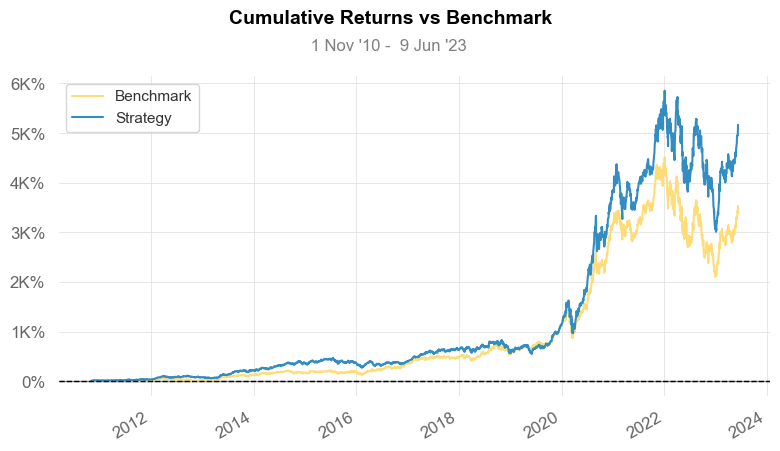

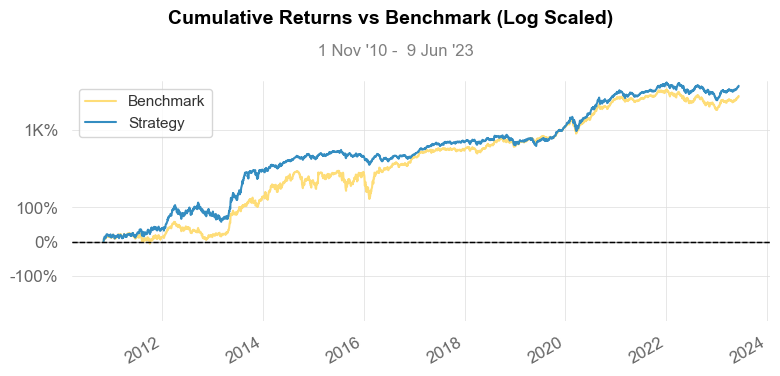

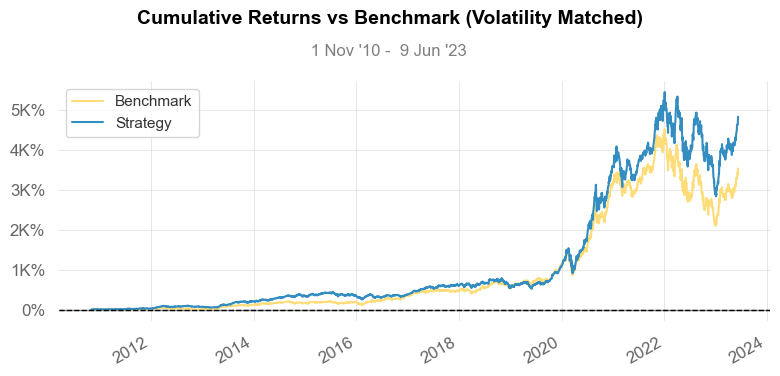

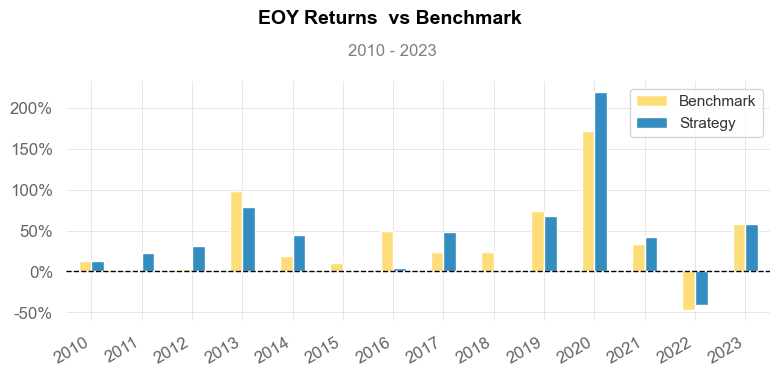

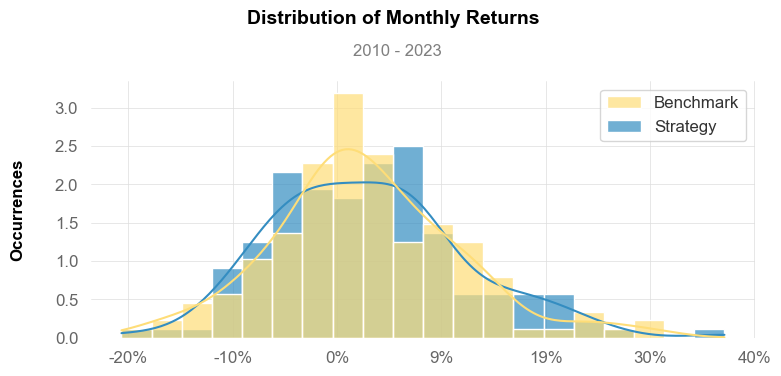

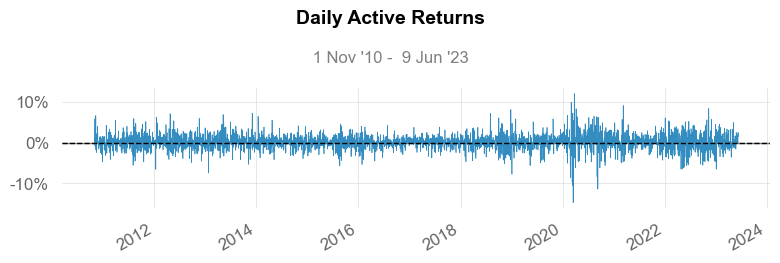

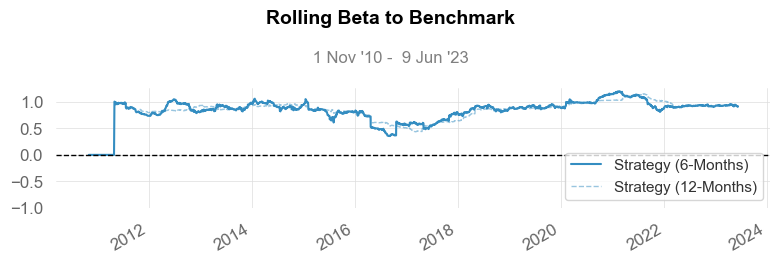

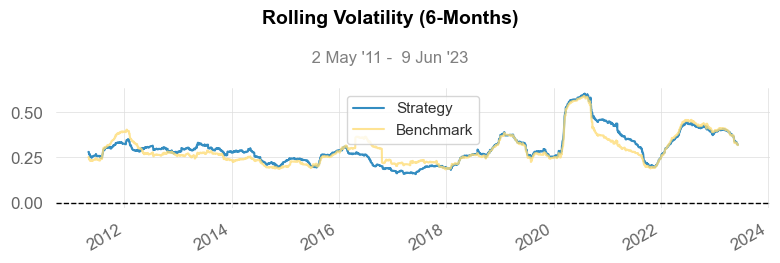

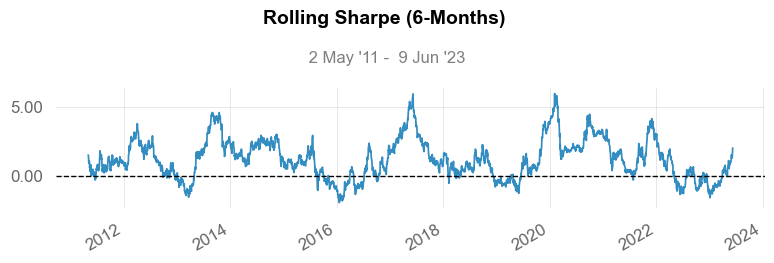

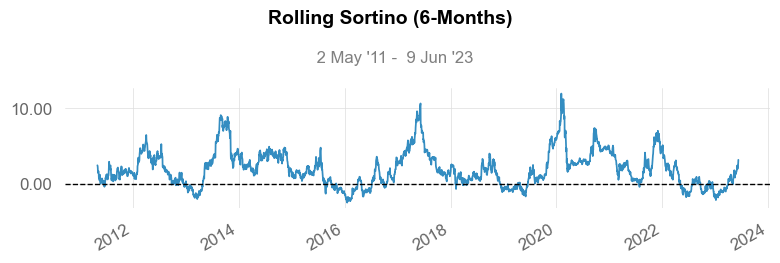

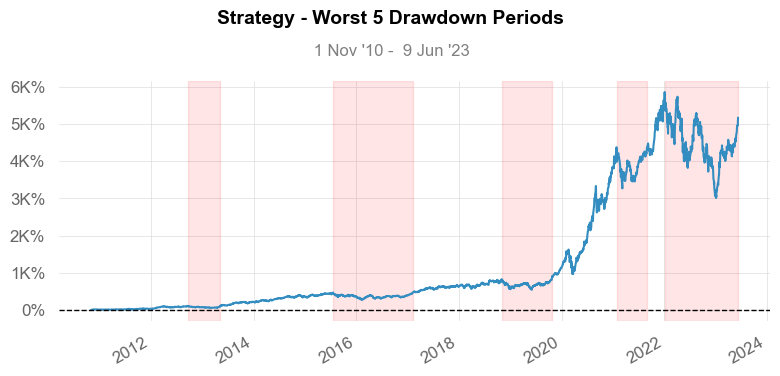

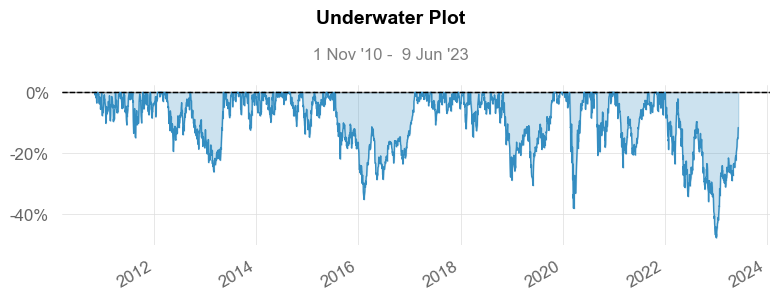

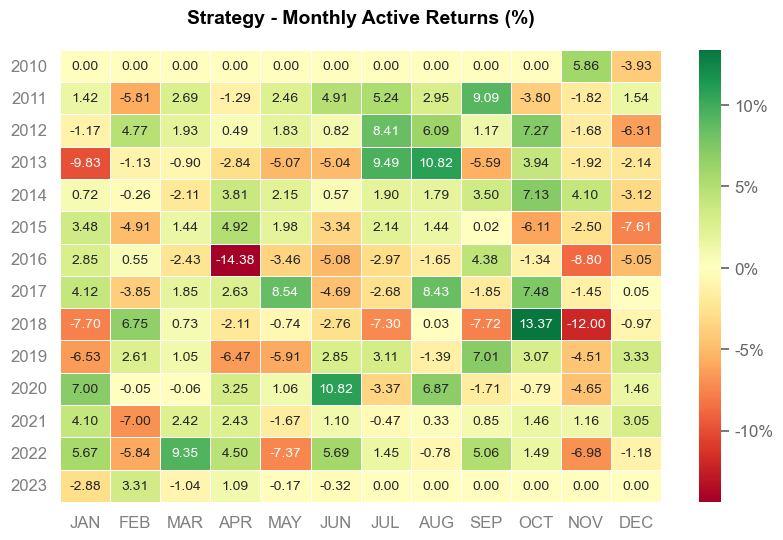

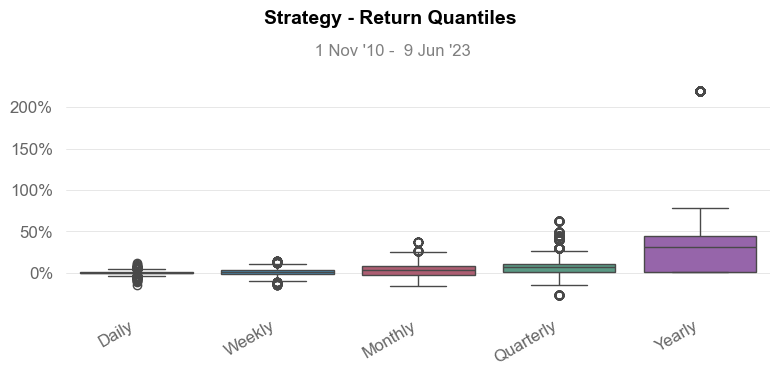

In [86]:
# Dispplaying new reports comparing the optimized portfolio to the first portfolio constructed
qs.reports.full(optimized_portfolio, benchmark = portfolio)

Based on the report above, the optimized portfolio appears to have performed better than the original portfolio. Here are some key conclusions that can be drawn by looking at the metrics and plots in the report:

. Cumulative Return: The optimized portfolio has generated a significantly higher cumulative return of 5,168.31% compared to 3,534.21% for the original portfolio. This means that the an investment in the optimized portfolio would have provided higher earnings for investors compared to the original portfolio.

. CAGR: The compounded annual growth rate (CAGR) of the optimized portfolio is higher at 24.24% compared to 21.74% for the original portfolio. This suggests that the optimized portfolio has generated a higher rate of return per year over the entire investment period.


. Sharpe Ratio: The optimized portfolio has a slightly higher Sharpe ratio of 1.16 compared to 1.09 for the original portfolio, indicating that it has generated a better risk-adjusted return.


. Drawdown: The maximum drawdown for the optimized portfolio is lower at -47.74% compared to -52.28% for the original portfolio. This means that the optimized portfolio experienced lower losses during the worst period of performance.


. Recovery Factor: The recovery factor for the optimized portfolio is higher at 9.6 compared to 8.01 for the original portfolio, which suggests that the optimized portfolio was able to recover from drawdowns more quickly and generate higher returns after experiencing losses.


. Win Rates: The optimized portfolio has slightly higher win rates for win days, win months, win quarters, and win years, indicating that it had a higher probability of generating positive returns over these periods.


. Beta: The optimized portfolio's beta of 0.88 indicates that the optimized portfolio is less volatile than the overall market, and much less volatile than the previously built portfolio.


. Annual Volatility: The optimized portfolio has a higher annual volatility than the original portfolio, with 31.26% compared to 30.63%, respectively.

### Black-Litterman Allocation Model

In 1992, Fischer Black and Robert Litterman introduced the Black-Litterman Allocation Model, which takes a Bayesian approach to asset allocation. It combines a prior estimate of returns with the investor's particular views on his/her expected returns to generate an optimal allocation. Multiple sources of information can be used to establish the prior estimate of returns, and the model allows investors to provide a confidence level for their views, which is then used to optimize allocation.

The Black-Litterman formula calculates a weighted average between the prior estimate of returns and the views, with the weighting determined by the level of confidence for each view.

**Prior**


A commonly used approach for determining a prior estimate of returns involves relying on the market's expectations, which are reflected in the asset's market capitalization.


To do this, we first need to estimate the level of risk aversion among market participants, represented by a parameter known as delta, which we calculate using the closing prices of the SP500. The higher the value for delta, the greater the market's risk aversion.

With this information, we can calculate the prior expected returns for each stock based on its market capitalization,the delta, and the covariance matrix S, which we've obtained before optimizing our portfolio with the Markowitz Mean-Variance Model. These prior expected returns gives us a starting point for the expected returns before we incoporate any of our views as investors.


**Views**


In the Black-Litterman model, investors can express their views as either absolute or relative. Absolute views involve statements like "APPL will return 10%", while relative views are represented by statements such as "AMZN will outperform AMD by 10%".


These views must be specified in the vector Q and mapped into each asset via the picking matrix P.


For instance, let's consider a portfolio with 10 assets:

1. TSLA


2. AAPL


3. NVDA


4. MSFT


5. META
6. AMZN


7. AMD


8. HD


9. GOOGL


10. BRKa


And then consider two absolute views and two relative views, such as:

1. TSLA will raise by 20%


2. APPL will drop by 15%


3. HD will outperform META by 10%


4. GOOGL and BRKa will outperform MSTF and AMZN by 5%


The views vector would be formed by taking the numbers above and specifying them as below:

        Q = np.array([0.20, -0.15, 0.10, 0.05]).reshape(-1,1)
        
The picking matrix would then be used to link the views of the 8 mentioned assets above to the universe of 10 assets, allowing us to propagate our expectations into the model:

                P = np.array([
             [1,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0,0],
             [0,0,0,0,-1,0,0,1,0,0],
             [0,0,0,-0.5,0,-0.5,0,0,0.5,0.5],
             ])

Absolute views have a single 1 in the column corresponding to the asset's order in the asset universe, while relative views have a positive number in the outperforming asset column, and a negative number in the underperforming asset column. Each row for relative views in P must sum up to 0, and the order of views in Q must correspond to the order of rows in P.

**Confidences**


The confidence matrix is used to help to define the allocations in each stock. It can be implemented using the Idzorek's method, allowing investors to specify their confidence level in each of their views as a percentage. The values in the confidence matrix range from 0 to 1, where 0 indicates a low level of confidence in the view, and 1 indicates a high level of confidence.

By using the confidence matrix, investors can better understand the potential impact of their views on their allocations. For example, if an investor has a high level of confidence in their view on a particular asset, they may choose to allocate a larger portion of their portfolio to that asset. On the other hand, if an investor has a low level of confidence in their view, they may choose to allocate a smaller portion of their portfolio or avoid the asset altogether.

For more information on the Black-Litterman Allocation Model, I highly suggest you read this session on the PyPortfolioOpt documentation.

In [87]:
# Mapping assets
assets = ['AAPL', 'TSLA', 'DIS', 'AMD']

In [97]:
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
# this used to be how to get market value data for a particular stock, but unfortunately as at today 11/11/2023 this api access has been disables

# Obtaining market cap for stocks
market_caps = pdr.get_quote_yahoo(assets)['marketCap']
market_caps

In [138]:
# Create a dictionary of the market caps gotten from external source
# note might lack accuracy
market_caps = {
    "AAPL": 2899055124992,
    "TSLA": 683260380544,
    "DIS": 157207338240,
    "AMD": 191583013120
}

# Create a Pandas Series from the dictionary
market_caps = pd.Series(market_caps)

market_caps

AAPL    2899055124992
TSLA     683260380544
DIS      157207338240
AMD      191583013120
dtype: int64

In [131]:
# Obtaining closing prices for the SP500
market_prices = yf.download('^GSPC', start='2010-11-01', end = '2023-06-11')['Adj Close']
market_prices

[*********************100%%**********************]  1 of 1 completed


Date
2010-11-01    1184.380005
2010-11-02    1193.569946
2010-11-03    1197.959961
2010-11-04    1221.060059
2010-11-05    1225.849976
                 ...     
2023-06-05    4273.790039
2023-06-06    4283.850098
2023-06-07    4267.520020
2023-06-08    4293.930176
2023-06-09    4298.859863
Name: Adj Close, Length: 3173, dtype: float64

In [132]:
# Obtaining market implied risk aversion, the delta
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

3.1516714133218104

In [135]:
# Covariance metrix
S

,aapl,tsla,dis,amd
aapl,0.081472,0.059600,0.031258,0.063479
tsla,0.059600,0.325602,0.045031,0.101363
dis,0.031258,0.045031,0.069266,0.047446
amd,0.063479,0.101363,0.047446,0.329010


In [136]:
# Changing columns and index to uppercase so it mathces market_caps
S.index = S.index.str.upper()
S.columns = S.columns.str.upper()
S

,AAPL,TSLA,DIS,AMD
AAPL,0.081472,0.059600,0.031258,0.063479
TSLA,0.059600,0.325602,0.045031,0.101363
DIS,0.031258,0.045031,0.069266,0.047446
AMD,0.063479,0.101363,0.047446,0.329010


In [139]:
# Obtaining Prior estimates
prior = black_litterman.market_implied_prior_returns(market_caps, delta, S)
prior

AAPL    0.255700
TSLA    0.358130
DIS     0.133336
AMD     0.279581
dtype: float64

Now that we have our prior estimates for each stock, we can now provide the model our views on these stocks and our confidence levels in our views.

In [140]:
# AAPL will rise by 5%
# TSLA will rise by 10%
# AMD will outperom Disney by 15%

Q = np.array([0.05, 0.10, 0.15])

In [141]:
# Linking views to assets
P = np.array([
    [1,0,0,0], # AAPL = 0.05
    [0,1,0,0], # TSLA = 0.10
    [0,0,-1,1] # AMD > DIS by 0.15
])

In [142]:
# Providing confidence levels
# Closer to 0.0 = Low confidence
# Closer to 1.0 = High confidence
confidences = [0.5,
              0.4,
              0.8]

In [144]:
# Creating model
bl = BlackLittermanModel(S, # Covariance Matrix
                         pi=prior, # Prior expected return
                         Q=Q, # Vector of views
                         P=P, # Metrix mapping the views
                         omega='idzorek', # Method to estimate uncertainty level of the views based on historical data
                         view_confidences=confidences # confidences
                        )

In [145]:
rets = bl.bl_returns() # calculating Expected returnss
ef = EfficientFrontier(rets, S) # Optimizing asset allocation

In [146]:
ef.max_sharpe() # Optimizing weights for maximal Sharpe ratio
weights= ef.clean_weights() # Cleaning weights
weights

OrderedDict([('AAPL', 0.64729),
             ('TSLA', 0.1785),
             ('DIS', 0.0),
             ('AMD', 0.17421)])

In [163]:
# Buildin Black-Litterman portfolio
black_litterman_weights = list(weights.values())
black_litterman_portfolio = aapl*black_litterman_weights[0] + tsla*black_litterman_weights[1] + dis*black_litterman_weights[2] + amd*black_litterman_weights[3]

After obtaining prior expected returns and providing our views, as well as our confidence levels, we have an optimized portfolio with the following weights for each assets:

**Apple**: 64.72%

**Tesla**: 17.85%

**DIS**: 0%

**AMD**: 17.42%

In [164]:
# Black-Litterman Porfolio daily returns
black_litterman_portfolio

Date
2010-11-01    0.003842
2010-11-02    0.013950
2010-11-03    0.013876
2010-11-04    0.045192
2010-11-05   -0.004745
                ...   
2023-06-05   -0.001761
2023-06-06    0.011008
2023-06-07   -0.011366
2023-06-08    0.022950
2023-06-09    0.014218
Name: Close, Length: 3173, dtype: float64

We might now go and compare the Black-Litterman optimized portfolio to the original portfolio

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-11-01   2010-11-01
End Period                 2023-06-09   2023-06-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          3,534.21%    4,050.64%
CAGR﹪                     21.74%       22.63%

Sharpe                     1.09         1.14
Prob. Sharpe Ratio         99.99%       100.0%
Smart Sharpe               1.03         1.09
Sortino                    1.59         1.67
Smart Sortino              1.52         1.59
Sortino/√2                 1.13         1.18
Smart Sortino/√2           1.07         1.12
Omega                      1.22         1.22

Max Drawdown               -52.28%      -44.87%
Longest DD Days            522          522
Volatility (ann.)          30.63%       29.81%
R^2                        0.87         0.87
Information Ratio          0.0          0.0
Calmar           

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2023-01-05,2023-06-09,522,-44.867969,-43.492976
2,2012-04-04,2013-03-04,2013-08-12,496,-35.911443,-34.540262
3,2020-02-20,2020-03-23,2020-06-04,106,-34.411546,-34.280071
4,2018-10-02,2019-01-03,2019-10-10,374,-32.924545,-29.043850
5,2015-02-24,2016-02-10,2016-07-22,515,-28.948912,-27.616143


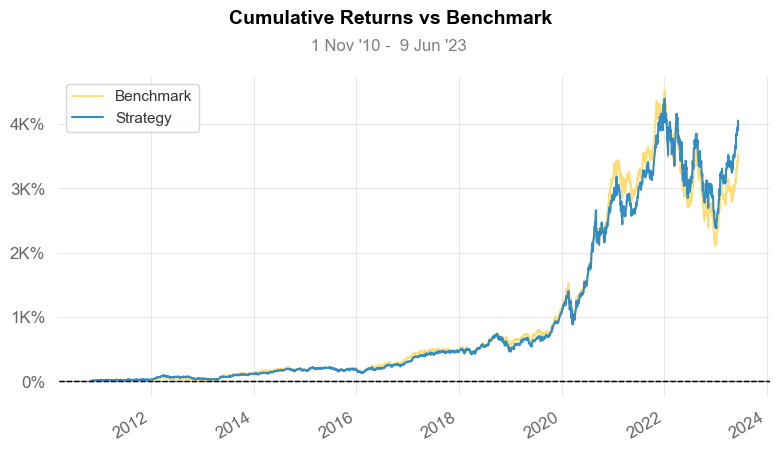

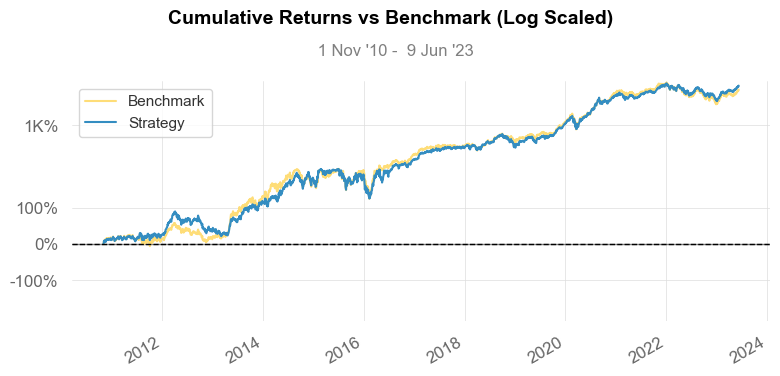

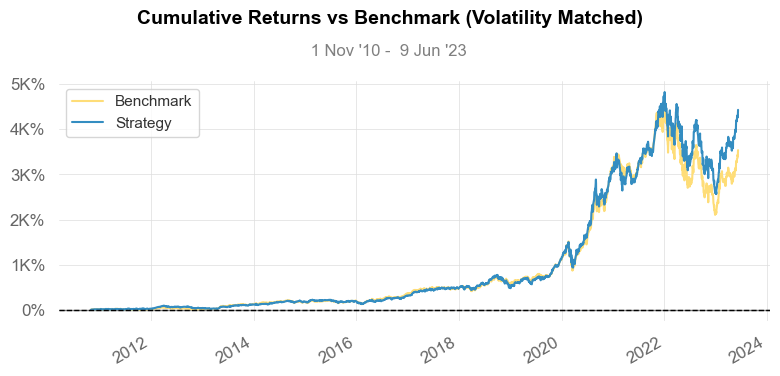

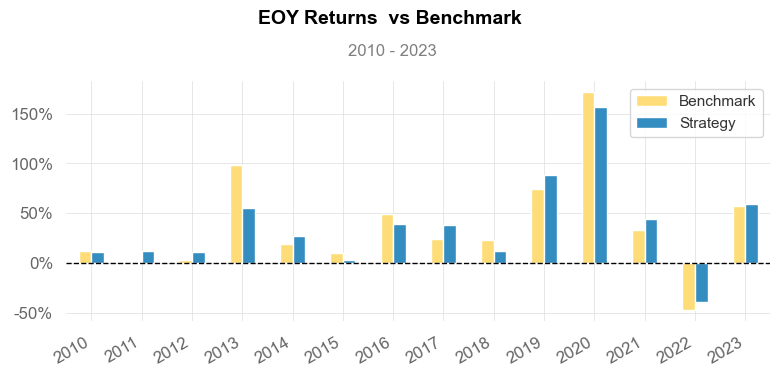

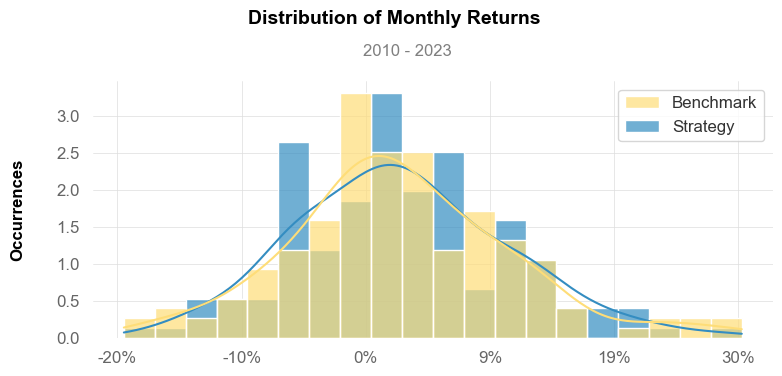

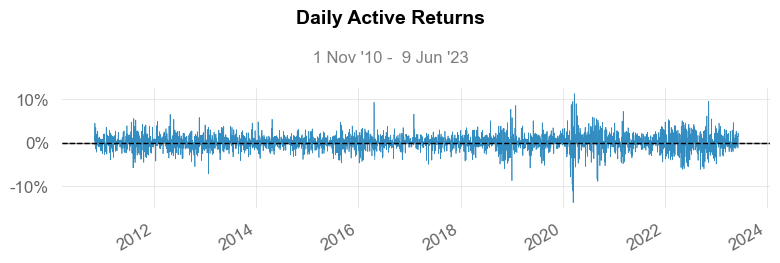

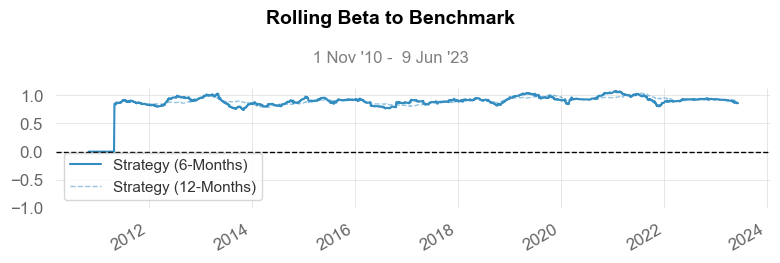

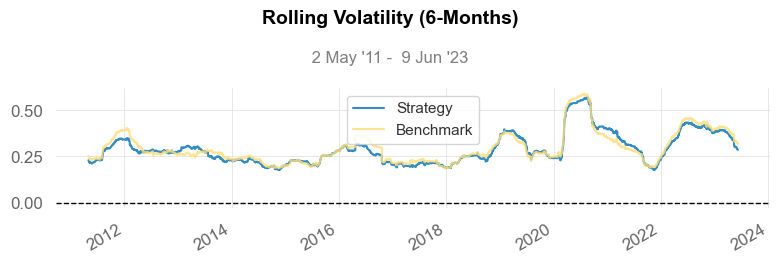

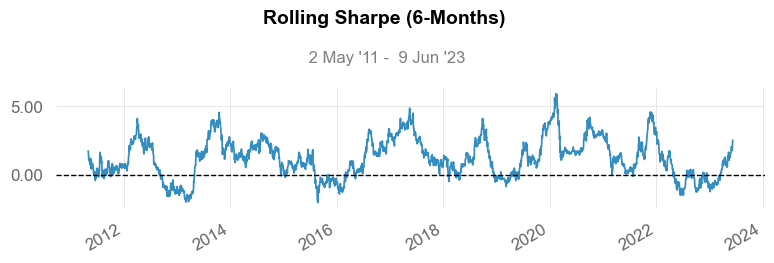

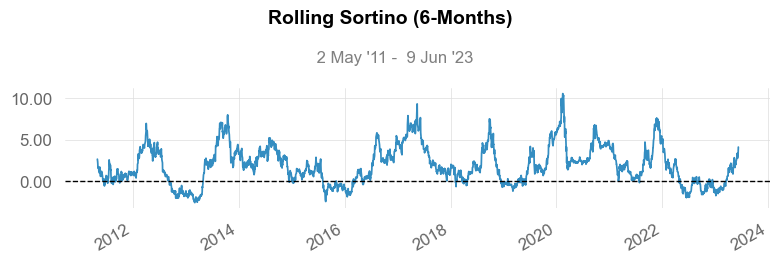

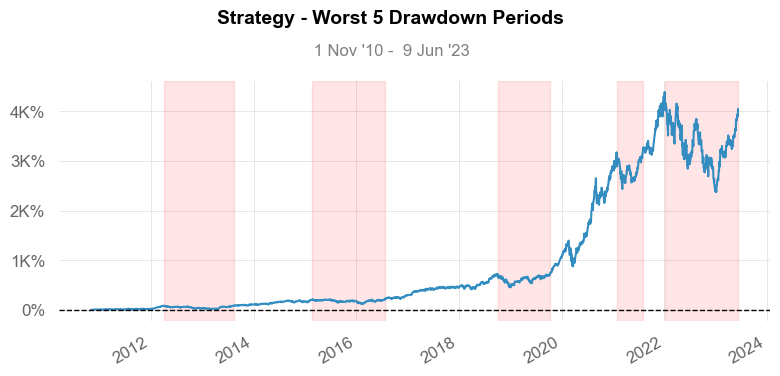

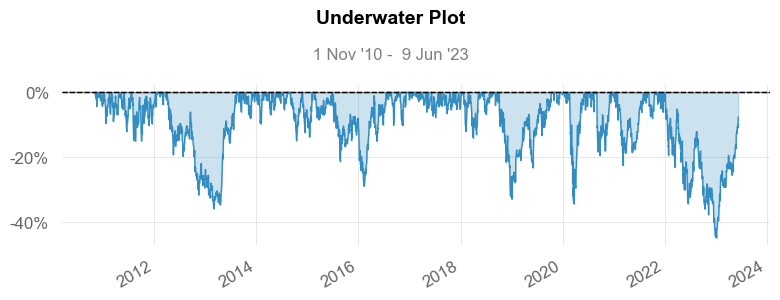

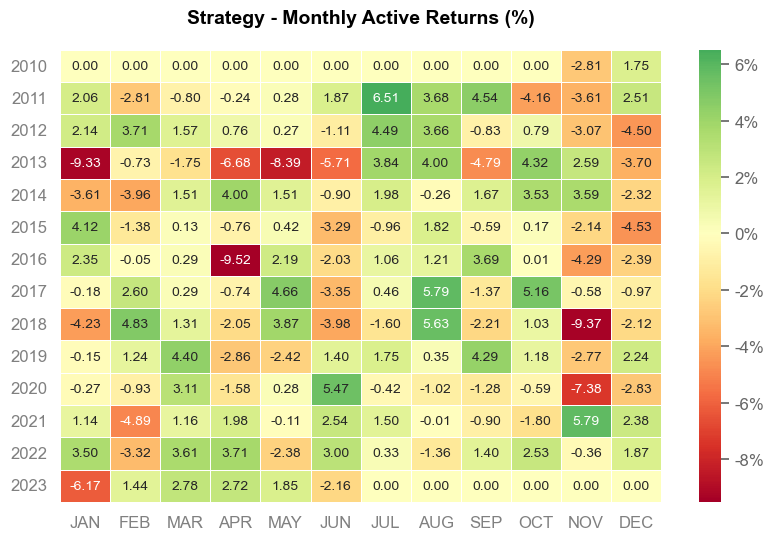

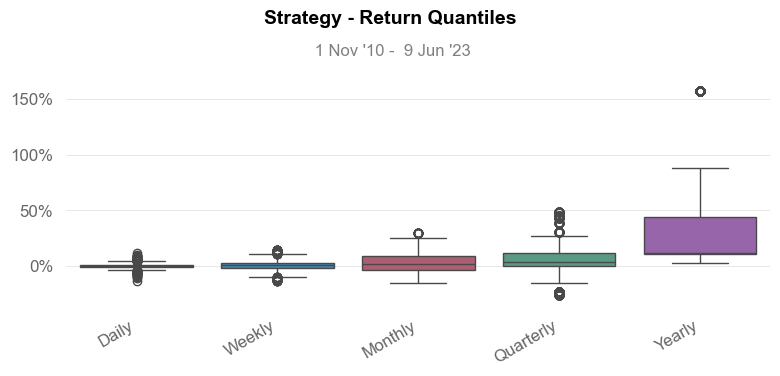

In [165]:
# Comparing Black-Litterman portfolio to the original portfolio
qs.reports.full(black_litterman_portfolio, benchmark = portfolio)

By using the Black-Litterman Allocation Model, we were able to improve our investment portfolio's performance metrics compared to the original portfolio, where each asset was allocated a uniform weight of 25%. The Black-Litterman optimized portfolio outperformed the original portfolio in several key metrics. First, it generated higher cumulative return and CAGR, indicating a stronger overall performance. Additionally, the Sharpe and Sortino ratios were higher, demonstrating greater risk-adjusted returns.

Moreover, the Black-Litterman portfolio had a lower maximum drawdown and annual volatility compared to the original portfolio, implying less downside risk and more stability to the optimized portfolio. In terms of expected returns, the Black-Litterman portfolio had higher daily, monthly, and yearly returns, and the Daily Value-at-Risk was lower, indicating a lower risk of significant losses in a day.

The Black-Litterman portfolio had a lower averaged drawdown and higher recovery factor, meaning that it can bounce back faster from losses, and the beta of the optimized portfolio was much lower than that of the original portfolio, indicating lower overall market risk. Overall, the Black-Litterman optimized portfolio achieved higher returns at lower risks.

Both the Markowitz Mean-Variance Model and the Black-Litterman Allocation Model effectively enhanced the performance and reduced the risk of our original portfolio by optimizing the allocation weights of Apple, Tesla, Disney, and AMD stocks.

The Markowitz optimization resulted in a portfolio that primarily invested in Apple and a smaller portion in Tesla, with no allocation in Disney and AMD. On the other hand, the Black-Litterman optimization allocated funds into all four stocks, but still favored Apple with the majority of the allocation.

The preference for Apple in both optimizations is not coincidental. Our initial analysis did reveal that Apple had the highest Sharpe ratio, lowest beta, and demonstrated superior performance with lower risk compared to the other stocks.


It's also interesting to compare the two optimized portfolios. The Markowitz optimized portfolio outperformed the Black-Litterman portfolio in terms of cumulative returns, CAGR, Sharpe ratio, Profit Factor, Recovery Factor, and overall performance. On the other hand, the Black-Litterman portfolio demonstrated some advantages, such as lower maximum and average drawdowns, lower annual volatility, and better performance on its worst day and worst month, although the Markowitz optimization still had lower losses than the Black-Litterman optimization did on its worst year.

In conclusion, portfolio optimization is a very important step to improve the risk-return relationship of a portfolio by adjusting its asset allocation. By using various mathematical models and optimization techniques, it's possible to efficiently improve performance and reduce the exposure to risk.


While there are different approaches to portfolio optimization, including the Markowitz Mean-Variance model and the Black-Litterman allocation model, there is no one-size-fits-all solution. The choice of the model to use depends on the investor's risk tolerance, investment goals, and overall market conditions.


To gain a deeper understanding of portfolio optimization, you can explore various research papers, journals, and books on the subject. Some sources of research to consider include books such as Modern Portfolio Theory and Investment Analysis by Edwin J. Elton and Martin Jay Gruber, Portfolio Selection by Harry Markowitz, and Active Portfolio Management: A Quantitative Approach for Producing Superior Returns and Controlling Risk by Richard C. Grinold and Ronald N. Kahn, which can provide valuable insights into the theory and practice of portfolio optimization.